In [2]:
library(ggplot2)
library("DESeq2")
library(dplyr)
library(tidyr)
library(tibble)
library(ggpubr)
library(ggsci)
require("ggrepel")
library(tidyverse)

In [4]:
SRhsf = read.table("HSFs/SRHSF-table.tsv",sep='\t',head=F)
colnames(SRhsf)[2] = "Gene"
hsf = SRhsf[,c(1,2)]

In [37]:
exp = read.table("GWASresults/MatrixEQTL/CtoT-eQTLmatrix-1.15e-7-dotplot.txt",sep='\t',head=F)
head(exp)
#subexp = exp %>% filter(V9 > 7.06)
#dim(subexp)

,V1,V2,V3,V4,V5,V6,V7,V8,V9
,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<int>,<dbl>
1,Zm00001d009958,Chr8,92365751,1706829135,S8_92365362,Chr8,92365362,1706828746,44.46161
2,Zm00001d042065,Chr3,149516587,701000580,S3_149520476,Chr3,149520476,701004469,41.72306
3,Zm00001d008053,Chr8,92366032,1706829416,S8_92365370,Chr8,92365370,1706828754,41.68980
4,Zm00001d009958,Chr8,92365751,1706829135,S8_92291208,Chr8,92291208,1706754592,40.41492
5,Zm00001d042065,Chr3,149516587,701000580,S3_149521663,Chr3,149521663,701005656,39.81420
6,Zm00001d009958,Chr8,92365751,1706829135,S8_92224756,Chr8,92224756,1706688140,39.30780


In [38]:
chromosome = read.table("GWASresults/GEMMA-noBoxcox//B73v4-chromosome-dotplot.size",head=T)
chrom = chromosome %>% mutate(midpoint = Start + Size/2) 
chrom

Chrom,Size,Start,Stop,midpoint
<fct>,<int>,<int>,<int>,<dbl>
Chr1,307041717,0,307041717,153520858
Chr2,244442276,307041717,551483993,429262855
Chr3,235667834,551483993,787151827,669317910
Chr4,246994605,787151827,1034146432,910649130
Chr5,223902240,1034146432,1258048672,1146097552
Chr6,174033170,1258048672,1432081842,1345065257
Chr7,182381542,1432081842,1614463384,1523272613
Chr8,181122637,1614463384,1795586021,1705024702
Chr9,159769782,1795586021,1955355803,1875470912


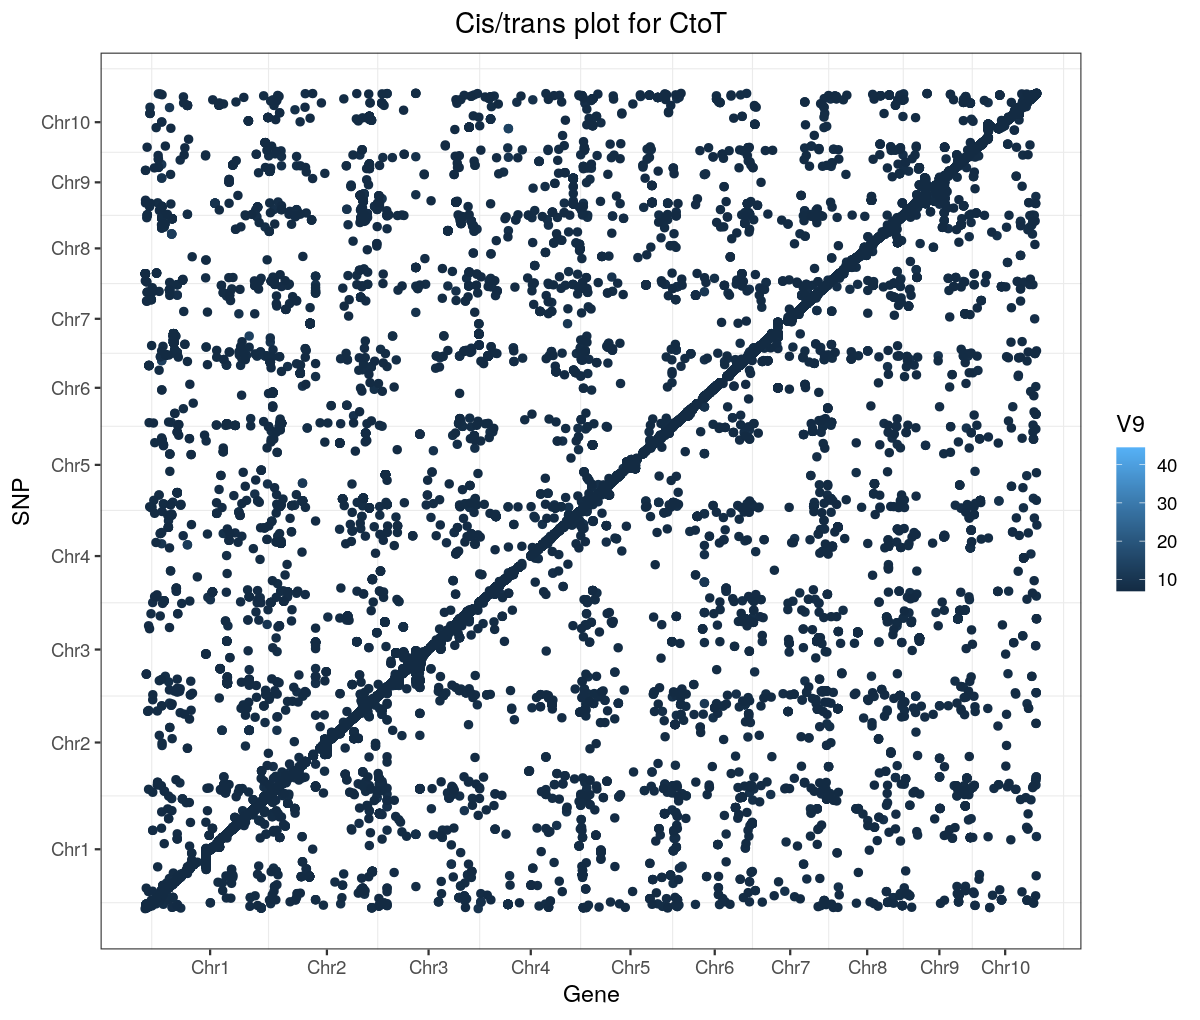

In [39]:
options(repr.plot.width=10, repr.plot.height=8.5)
ggscatter(exp, "V4", "V8", color="V9") + theme_bw(base_size = 14) + ggtitle("Cis/trans plot for CtoT") + 
    theme(panel.grid.major=element_blank(),plot.title = element_text(hjust = 0.5)) + 
    scale_x_continuous(breaks=c(153520858,429262855,669317910,910649130,1146097552,1345065257,
                              1523272613,1705024702,1875470912,2030846960),
                    labels=c("Chr1", "Chr2", "Chr3", "Chr4", "Chr5", "Chr6", "Chr7", "Chr8", "Chr9", "Chr10")) +
    scale_y_continuous(breaks=c(153520858,429262855,669317910,910649130,1146097552,1345065257,
                              1523272613,1705024702,1875470912,2030846960),
                    labels=c("Chr1", "Chr2", "Chr3", "Chr4", "Chr5", "Chr6", "Chr7", "Chr8", "Chr9", "Chr10")) +
    xlab("Gene") + ylab("SNP")

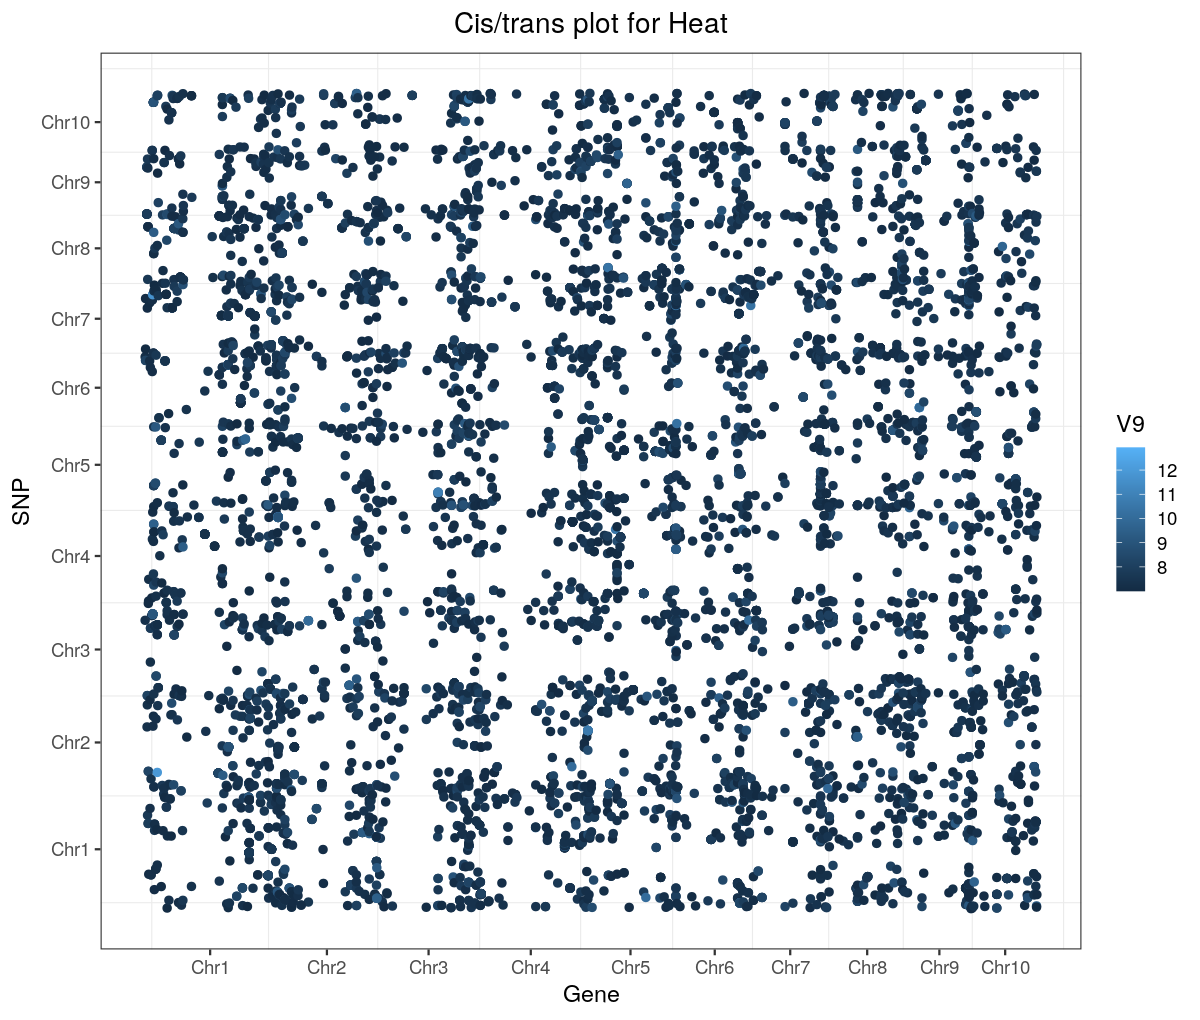

In [51]:
options(repr.plot.width=10, repr.plot.height=8.5)
ggscatter(subexp, "V4", "V8", color="V9") + theme_bw(base_size = 14) + ggtitle("Cis/trans plot for Heat") + 
    theme(panel.grid.major=element_blank(),plot.title = element_text(hjust = 0.5)) + 
    scale_x_continuous(breaks=c(153520858,429262855,669317910,910649130,1146097552,1345065257,
                              1523272613,1705024702,1875470912,2030846960),
                    labels=c("Chr1", "Chr2", "Chr3", "Chr4", "Chr5", "Chr6", "Chr7", "Chr8", "Chr9", "Chr10")) +
    scale_y_continuous(breaks=c(153520858,429262855,669317910,910649130,1146097552,1345065257,
                              1523272613,1705024702,1875470912,2030846960),
                    labels=c("Chr1", "Chr2", "Chr3", "Chr4", "Chr5", "Chr6", "Chr7", "Chr8", "Chr9", "Chr10")) +
    xlab("Gene") + ylab("SNP")

In [3]:
metrics = read.table("SNPs/Widiv-110genos-RNAseq-SNP-summary.txt",sep='\t',head=T)
head(metrics)

,Genotype,Total,Alt,AltFreq,Ref,Het,HetFreq,Consistent,Inconsistent
,<fct>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>
1,C01,197251,173357,0.879,0,23894,0.121,74193,12427
2,C02,45942,42088,0.916,0,3854,0.084,20572,653
3,C03,221350,209602,0.947,0,11748,0.053,99175,2653
4,C04,182505,174597,0.957,0,7908,0.043,81634,1404
5,C05,179991,171713,0.954,0,8278,0.046,84997,2074
6,C06,160625,154532,0.962,0,6093,0.038,75998,1597


In [4]:
B73 = c("C24","C66","C106","H24","H66","H106")

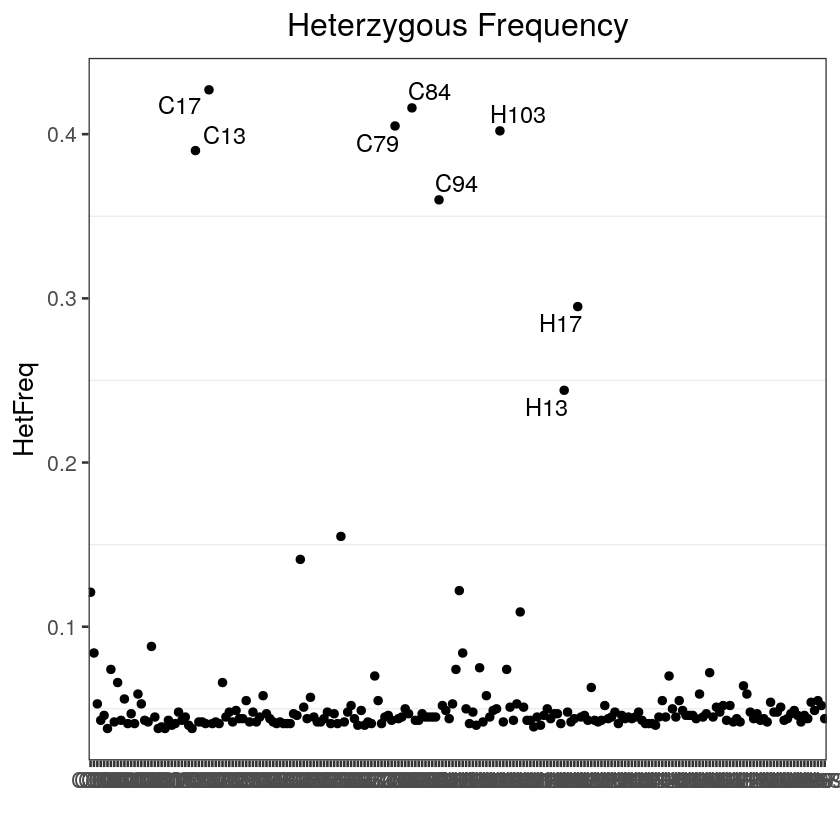

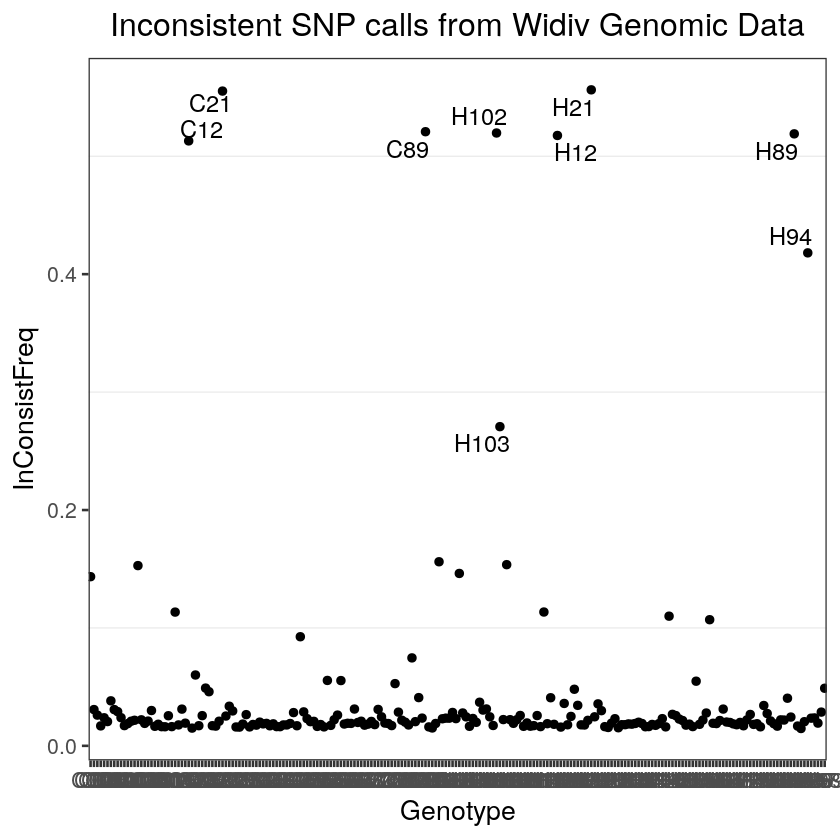

In [32]:
m = metrics %>% mutate(InConsistFreq = (Inconsistent/(Inconsistent+Consistent))) %>% filter(!Genotype %in% B73)
ggplot(m, aes(x = Genotype, y = HetFreq) )+
  geom_point(size=2) + geom_text_repel(
    data = subset(m, HetFreq > 0.2),
    aes(label = Genotype),
    size = 5
  ) + xlab('') + theme_bw(base_size = 16) + ggtitle("Heterzygous Frequency") + 
    theme(panel.grid.major=element_blank(),plot.title = element_text(hjust = 0.5))
m$InConsistFreq = as.numeric(m$InConsistFreq)
ggplot(m, aes(x = Genotype, y = InConsistFreq) )+geom_point(size=2) + geom_text_repel(
    data = subset(m, InConsistFreq > 0.2),
    aes(label = Genotype),
    size = 5
  ) + theme_bw(base_size = 16) + ggtitle("Inconsistent SNP calls from Widiv Genomic Data") + 
    theme(panel.grid.major=element_blank(),plot.title = element_text(hjust = 0.5))

,Genotype,Alt,Het
,<fct>,<int>,<int>
1,C01,173357,23894
2,C02,42088,3854
3,C03,209602,11748
4,C04,174597,7908
5,C05,171713,8278
6,C06,154532,6093


[1] 436

[1] 218

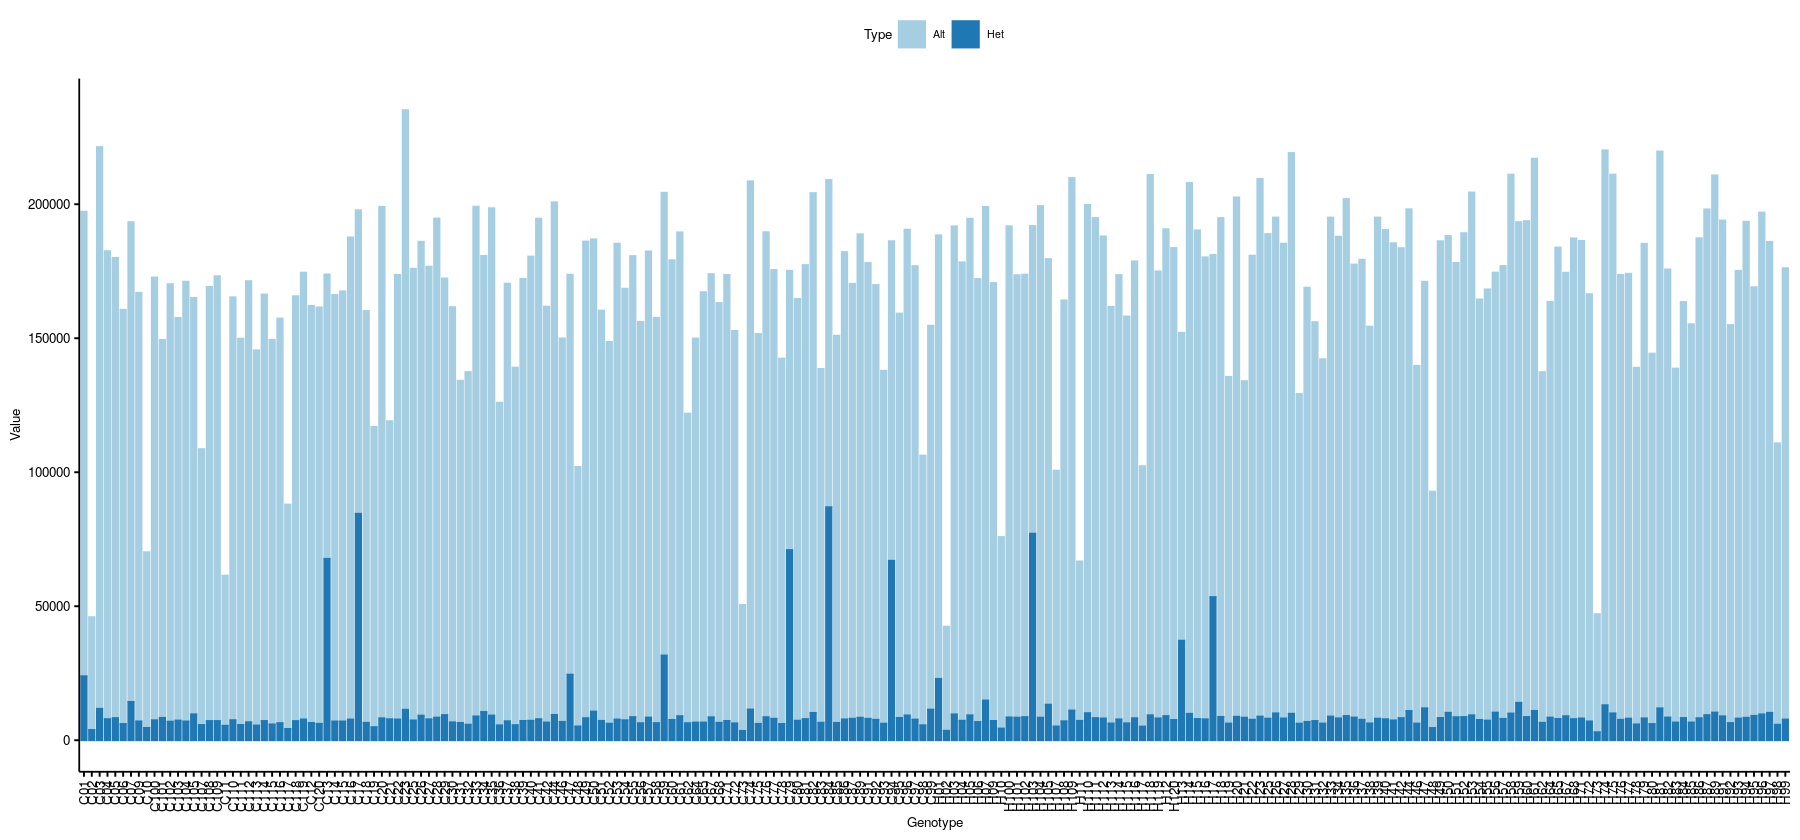

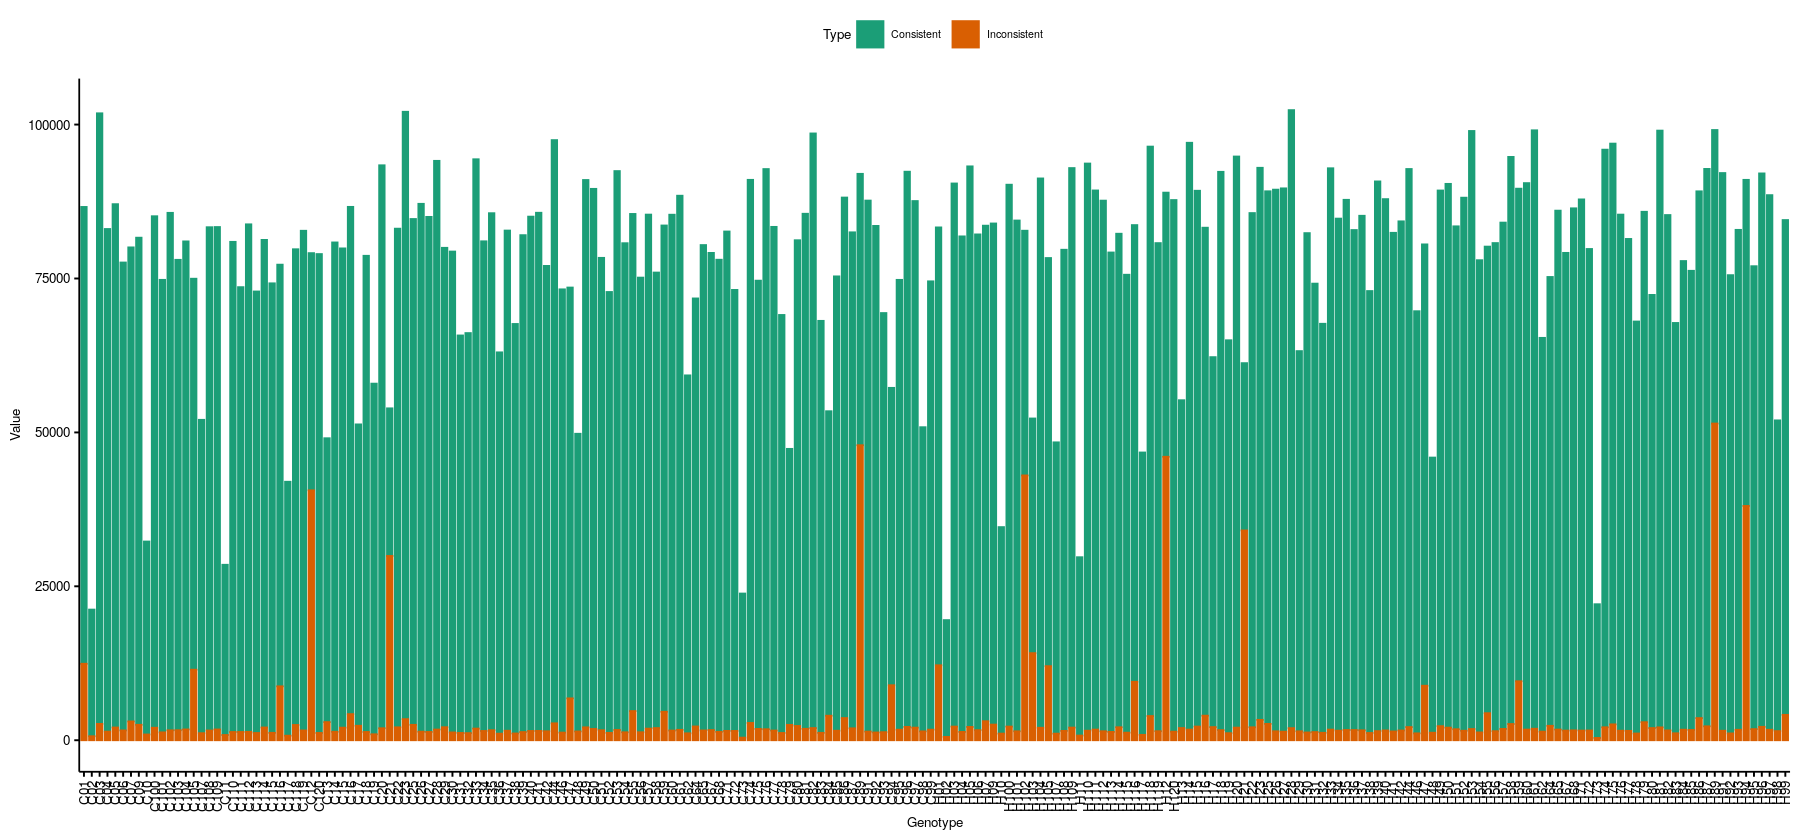

In [62]:
m %>% select(Genotype, Alt, Het) %>% head()
m1 = m %>% select(Genotype, Alt, Het) %>% gather(Type, Value, -Genotype)
options(repr.plot.width=15, repr.plot.height=7)
length(sort(m1$Genotype))
length(unique(m1$Genotype))
m1$Genotype = factor(m1$Genotype, levels=sort(unique(m1$Genotype)))
ggbarplot(m1, "Genotype", "Value",
  fill = "Type", color = "Type", palette = "Paired", lab.col = "white", lab.pos = "in") +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),text = element_text(size=8))

m2 = m %>% select(Genotype, Consistent, Inconsistent) %>% gather(Type, Value, -Genotype)
m2$Genotype = factor(m2$Genotype, levels=sort(unique(m2$Genotype)))
ggbarplot(m2, "Genotype", "Value",
  fill = "Type", color = "Type", palette = "Dark2", lab.col = "white", lab.pos = "in") +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),text = element_text(size=8))

In [105]:
#===================data processing for calling CPM and DEGs=====================================#

ori_meta = read.table("GeneCounts//HeatPanel-genecounts-table-110genos-meta.txt",sep='\t',head=T)
widiv = read.table("PCAplot/Widiv-Class-information.txt")
colnames(widiv) = c("Genotype","Group")
meta = ori_meta %>% left_join(widiv, by="Genotype")
head(widiv)
meta$Condition <- relevel(meta$Condition, ref='Control')
rmline = c("C12","H12","C13","H13","C17","H17","C79","H79","C84","H84","C94","H94","C102","H102","C103","H103")
meta = meta %>% filter(!SampleID %in% rmline) # meta table for all samples 
head(meta)
# read actual counts
count = read.table("GeneCounts/HeatPanel-genecounts-table-110genos-corrected.txt",sep='\t',head=T)
colnames(count)[1] = "Feature"
n = count %>% column_to_rownames(var="Feature") %>% select(-C12, -H12, -C13, -H13, -C17, -H17, -C79, -H79, 
                                                           -C84, -H84, -C94, -H94, -C102, -H102, -C103, -H103)# count table for all samples 
head(n)
B73 = n %>% select(C106, C24, C66, H24, H66, H106)
B73meta = meta %>% filter(SampleID %in% c("C106","C66", "C24","H24", "H66", "H106"))

,Genotype,Group
,<fct>,<fct>
1,B73,stiff_stalk
2,1538,iodent
3,2369,stiff_stalk
4,29MIBZ2,iodent
5,2FACC,stiff_stalk
6,2FADB,stiff_stalk


,SampleID,Genotype,Condition,Group
,<fct>,<fct>,<fct>,<fct>
1,C01,1538,Control,iodent
2,C02,2369,Control,stiff_stalk
3,C03,2MA22,Control,non_stiff_stalk
4,C04,33-16,Control,unknown
5,C05,3IJI1,Control,iodent
6,C06,4226,Control,unknown


,C01,C02,C03,C04,C05,C06,C07,C09,C10,C100,⋯,H87,H89,H91,H92,H93,H95,H96,H97,H98,H99
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
gene:ENSRNA049453582,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,1,0,0,0
gene:ENSRNA049453693,0,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,1,0,0,0
gene:ENSRNA049453717,1,0,0,0,1,1,0,0,0,0,⋯,0,0,0,1,0,1,0,0,1,3
gene:ENSRNA049453841,1,0,0,0,0,1,0,1,1,1,⋯,4,0,1,1,0,0,0,0,0,0
gene:ENSRNA049454125,1,5,9,2,6,1,2,7,1,4,⋯,15,11,10,3,5,15,3,2,10,14
gene:ENSRNA049454254,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,2,0,0,0


In [106]:
dds = DESeqDataSetFromMatrix(countData=n, colData = meta, design=~Condition)
dds2 = DESeq(dds)
dds1 = estimateSizeFactors(dds)
totalfpmcount = as.data.frame(fpm(dds1, robust = TRUE))

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 2958 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [107]:
write.table(file="Widiv-CPM-gene.txt",totalfpmcount)

In [108]:
exptotalfpmcount = totalfpmcount[rowMeans(totalfpmcount) > 1,]
write.table(file="Widiv-CPM-expressed-gene.txt",exptotalfpmcount)

In [21]:
# calculating ratio between Control vs. Heat

x = read.table("Widiv-CPM-expressed-gene.txt",head=T)
exptotalfpm = x %>% rownames_to_column(var="Gene") %>% gather(key="Code",value="CPM",-Gene) %>% 
    mutate(Condition = ifelse(startsWith(Code, "C"),"Control","Heat")) %>% 
    mutate(Genotype = ifelse(startsWith(Code, "C"),str_replace(Code, "C", ""),str_replace(Code, "H", ""))) %>% 
    mutate(Genotype = paste('G',as.character(as.integer(Genotype)),sep='')) %>% select(-Code) 
head(exptotalfpm)

,Gene,CPM,Condition,Genotype
,<chr>,<dbl>,<chr>,<chr>
1,ENSRNA049458957,1.4258540,Control,G1
2,ENSRNA049459076,2.0595668,Control,G1
3,ENSRNA049459101,1.4575396,Control,G1
4,ENSRNA049459156,1.8694530,Control,G1
5,ENSRNA049463813,0.6337129,Control,G1
6,ENSRNA049465110,1.1089975,Control,G1


In [28]:
control = exptotalfpm %>% filter(Condition == 'Control')
heat = exptotalfpm %>% filter(Condition == 'Heat')
head(control)
head(heat)
combine = control %>% left_join(heat, by=c("Gene","Genotype")) %>% mutate(CtoT = (CPM.x+.1)/(CPM.y+.1)) %>%
    select(Genotype, CtoT, Gene) %>% spread(Genotype, CtoT) %>% select(-G24, -G106)
head(combine)
write.table(file="Widiv-CPM-expressed-gene-CtoT.txt",combine,sep=',',row.names = FALSE)

,Gene,CPM,Condition,Genotype
,<chr>,<dbl>,<chr>,<chr>
1,ENSRNA049458957,1.4258540,Control,G1
2,ENSRNA049459076,2.0595668,Control,G1
3,ENSRNA049459101,1.4575396,Control,G1
4,ENSRNA049459156,1.8694530,Control,G1
5,ENSRNA049463813,0.6337129,Control,G1
6,ENSRNA049465110,1.1089975,Control,G1


,Gene,CPM,Condition,Genotype
,<chr>,<dbl>,<chr>,<chr>
1,ENSRNA049458957,1.2366475,Heat,G1
2,ENSRNA049459076,1.1169720,Heat,G1
3,ENSRNA049459101,0.9972964,Heat,G1
4,ENSRNA049459156,0.8776208,Heat,G1
5,ENSRNA049463813,2.7924299,Heat,G1
6,ENSRNA049465110,0.5185941,Heat,G1


,Gene,G1,G10,G100,G101,G104,G105,G107,G108,G109,⋯,G89,G9,G91,G92,G93,G95,G96,G97,G98,G99
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSRNA049458957,1.1415530,1.1963526,1.1865971,0.9135426,1.269360,1.1217844,1.7812727,1.0093881,0.9739658,⋯,0.9721486,2.3884387,3.9416478,9.9376386,2.2175335,0.6814903,0.59435914,1.3281572,1.0729728,1.3348022
2,ENSRNA049459076,1.7745411,2.7485962,1.1149402,0.9985700,1.287188,0.8523861,1.5720242,1.3849801,0.9110884,⋯,0.8946464,2.0287562,2.4342443,1.3675146,3.3653518,1.0441472,0.80829759,2.5724446,0.8668866,1.2116468
3,ENSRNA049459101,1.4194338,0.8186361,0.6113268,0.4578255,1.202349,1.2807391,1.3959787,0.6862794,0.6662261,⋯,1.0788956,1.9901454,1.1024675,3.1761983,0.9440803,1.9258028,0.66339732,2.7121585,1.1099635,0.9595997
4,ENSRNA049459156,2.0145366,1.8182872,1.3261339,0.9952873,1.438053,1.4994407,1.4232215,1.2189892,1.2869336,⋯,1.2887983,2.2292194,3.5594079,2.2114868,0.9056984,1.5179514,0.78938861,1.4212010,1.1083357,1.5442140
5,ENSRNA049463813,0.2536666,0.1500377,0.9045256,2.5447554,1.064066,0.7802564,0.1847661,2.9150732,0.5028205,⋯,0.2781812,0.2207911,0.4840125,0.7823734,1.1880832,1.0000000,0.02709275,0.4957192,0.5906181,0.3191547
6,ENSRNA049465110,1.9544277,5.8207899,1.6042082,8.9837154,1.036699,0.8167969,1.0030578,0.4728885,0.4338461,⋯,1.9785069,6.6695825,3.9060475,2.3676213,100.0714689,3.2744183,2.88891480,3.4302195,3.3218785,5.5200768


In [34]:
rownames(combine) = combine$Gene
d = as.data.frame(t(combine))
colnames(d) = d[1,]
head(d)
write.table(d, file="Widiv-CPM-expressed-gene-CtoT-transformed.csv",sep=',')

,c(Gene = 103),c(Gene = 103).1,c(Gene = 103).2,c(Gene = 103).3,c(Gene = 97),c(Gene = 103).4,c(Gene = 103).5,c(Gene = 103).6,c(Gene = 100),c(Gene = 103).7,⋯,c(Gene = 103),c(Gene = 103).1,c(Gene = 103).2,c(Gene = 103).3,c(Gene = 103).4,c(Gene = 103).5,c(Gene = 103).6,c(Gene = 103).7,c(Gene = 98),c(Gene = 79)
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
Gene,ENSRNA049458957,ENSRNA049459076,ENSRNA049459101,ENSRNA049459156,ENSRNA049463813,ENSRNA049465110,ENSRNA049469775,ENSRNA049472786,ENSRNA049474917,ENSRNA049477077,⋯,Zm00001d054084,Zm00001d054088,Zm00001d054089,Zm00001d054093,Zm00001d054104,Zm00001d054105,Zm00001d054106,Zm00001d054107,Zm00001d054110,Zm00001d054111
G1,1.141553e+00,1.774541e+00,1.419434e+00,2.014537e+00,2.536666e-01,1.954428e+00,8.994091e-01,5.330126e-01,4.831589e-01,5.666062e-01,⋯,6.506463e-01,1.144870e+00,7.018441e-01,6.196286e-01,8.822701e-01,1.216054e+00,1.282118e+00,4.150559e-01,2.587577e+00,1.032170e+00
G10,1.196353e+00,2.748596e+00,8.186361e-01,1.818287e+00,1.500377e-01,5.820790e+00,1.417435e+00,1.545191e+00,1.557080e+00,1.139214e+00,⋯,8.782984e-01,9.898839e-01,8.411651e-01,1.071533e+00,9.205459e-01,1.126538e+00,9.838931e-01,5.263801e-01,1.043685e+00,1.024535e+00
G100,1.186597e+00,1.114940e+00,6.113268e-01,1.326134e+00,9.045256e-01,1.604208e+00,1.250403e+00,6.777990e-01,5.964868e-01,8.071265e-01,⋯,8.231258e-01,1.078303e+00,9.516316e-01,6.500162e-01,1.095010e+00,1.037945e+00,1.240628e+00,3.528100e-01,8.066816e-01,8.012226e-01
G101,0.913542636,0.998569967,0.457825477,0.995287257,2.544755401,8.983715399,1.750408439,0.533269362,0.936767831,0.782952727,⋯,0.848777171,1.176731760,1.042049267,0.767353444,0.760900321,1.275753498,1.201637268,0.614842716,0.729044749,0.393830062
G104,1.269360e+00,1.287188e+00,1.202349e+00,1.438053e+00,1.064066e+00,1.036699e+00,2.220201e+00,1.014088e+00,1.221362e+00,6.171966e+00,⋯,6.512308e-01,1.094760e+00,7.373707e-01,1.392960e+00,1.138221e+00,8.318109e-01,1.110396e+00,4.699240e-01,1.181790e+00,1.000000e+00


In [22]:
dds = DESeqDataSetFromMatrix(countData=B73, colData = B73meta, design=~Condition)
dds2 = DESeq(dds)
dds1 = estimateSizeFactors(dds)
fpmcount = as.data.frame(fpm(dds1, robust = TRUE))

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [23]:
write.table(file="Heatstresspanel-B73-CPM.txt",fpmcount)

In [24]:
expB73fpmcount = fpmcount[rowMeans(fpmcount) > 1,]
write.table(file="Heatstresspanel-expressed-B73-CPM.txt",expB73fpmcount)

In [27]:
res = as.data.frame(results(dds2, alpha = 0.05, name="Condition_Heat_vs_Control"))

In [36]:
myde = res %>% rownames_to_column(var="Gene") %>% 
    mutate(Feature= str_replace(Gene, "gene:", "")) %>% filter(padj < 0.05 & abs(log2FoldChange) > 1)
dim(myde)

[1] 2402    8

In [31]:
write.table(res, file="Heatstresspanel-B73-DEG.txt")

In [29]:
hsf = read.table("HSFs/HSFs-list.txt",head=F)
head(hsf$V1)

[1] Zm00001d005843 Zm00001d005888 Zm00001d010812 Zm00001d011406 Zm00001d012749
[6] Zm00001d012823
31 Levels: GRMZM2G118485 Zm00001d005843 Zm00001d005888 ... Zm00001d052738

In [32]:
depp = read.table("../../stress-experiment/ca20a3/ca20a3-B73v4-W22-Mo17index/2020AugReanalysis/DEvalue/B73-DE-Gene-expressed-heat-Aug.txt",head=T)
head(depp)
degpp = depp %>% filter(padj < 0.05 & abs(log2FoldChange) > 1) 
head(degpp)
dim(degpp)
degppf = degpp %>% filter(Feature %in% hsf$V1)

,Feature,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSRNA049455608,104.03499,0.8714300,0.7551335,1.1540079,0.24849694,0.34419891
2,ENSRNA049456552,189.61009,1.2373018,0.7558271,1.6370169,0.10162694,0.16370864
3,ENSRNA049458448,16.28371,1.3675115,0.6564836,2.0830857,0.03724341,0.06925599
4,ENSRNA049458758,13.08860,1.0414242,0.5359986,1.9429605,0.05202093,0.09242218
5,ENSRNA049458826,48.05622,0.0586622,0.4345338,0.1350003,0.89261163,0.92315812
6,ENSRNA049458874,32.08825,0.9847078,0.6763093,1.4560020,0.14539206,0.22114196


,Feature,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSRNA049459267,109.01796,2.118876,0.8209380,2.581043,9.850238e-03,2.158412e-02
2,ENSRNA049459300,242.13737,3.101872,1.0286963,3.015343,2.566885e-03,6.451783e-03
3,ENSRNA049461747,16.52808,1.374948,0.5338391,2.575585,1.000708e-02,2.189189e-02
4,ENSRNA049463774,19.65697,3.041187,0.6009746,5.060426,4.183206e-07,2.142331e-06
5,ENSRNA049463813,105.08809,2.948347,0.4896403,6.021456,1.728553e-09,1.265063e-08
6,ENSRNA049463865,25.82906,1.347858,0.5939199,2.269428,2.324231e-02,4.594340e-02


[1] 7131    7

In [33]:
hsf_matrix = res %>% rownames_to_column(var="Gene") %>% 
    mutate(Feature= str_replace(Gene, "gene:", "")) %>% filter(Feature %in% hsf$V1) %>% left_join(degppf,by="Feature") %>% select(log2FoldChange.x, log2FoldChange.y, Feature) %>% filter(!is.na(log2FoldChange.x) | !is.na(log2FoldChange.y)) %>% column_to_rownames(var="Feature")

In [37]:
combine = degpp %>% left_join(myde, by="Feature") %>% select(Feature, log2FoldChange.x, log2FoldChange.y) %>% 
        column_to_rownames(var="Feature") %>% drop_na()
dim(combine)
cor.test(combine$log2FoldChange.x,combine$log2FoldChange.y,method = "spearman")

[1] 1448    2


	Spearman's rank correlation rho

data:  combine$log2FoldChange.x and combine$log2FoldChange.y
S = 97607900, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.8071007 


In [34]:
#67+17=84
combine %>% filter(log2FoldChange.x > 0 & log2FoldChange.y > 0) %>% nrow()
combine %>% filter(log2FoldChange.x < 0 & log2FoldChange.y < 0) %>% nrow()
dim(combine)

[1] 896

[1] 463

[1] 1448    2

In [38]:
hsf_total = fpmcount %>% rownames_to_column(var="Gene") %>% mutate(Feature= str_replace(Gene, "gene:", "")) %>% select(-Gene) %>% filter(Feature %in% hsf$V1) %>%
      column_to_rownames(var="Feature")

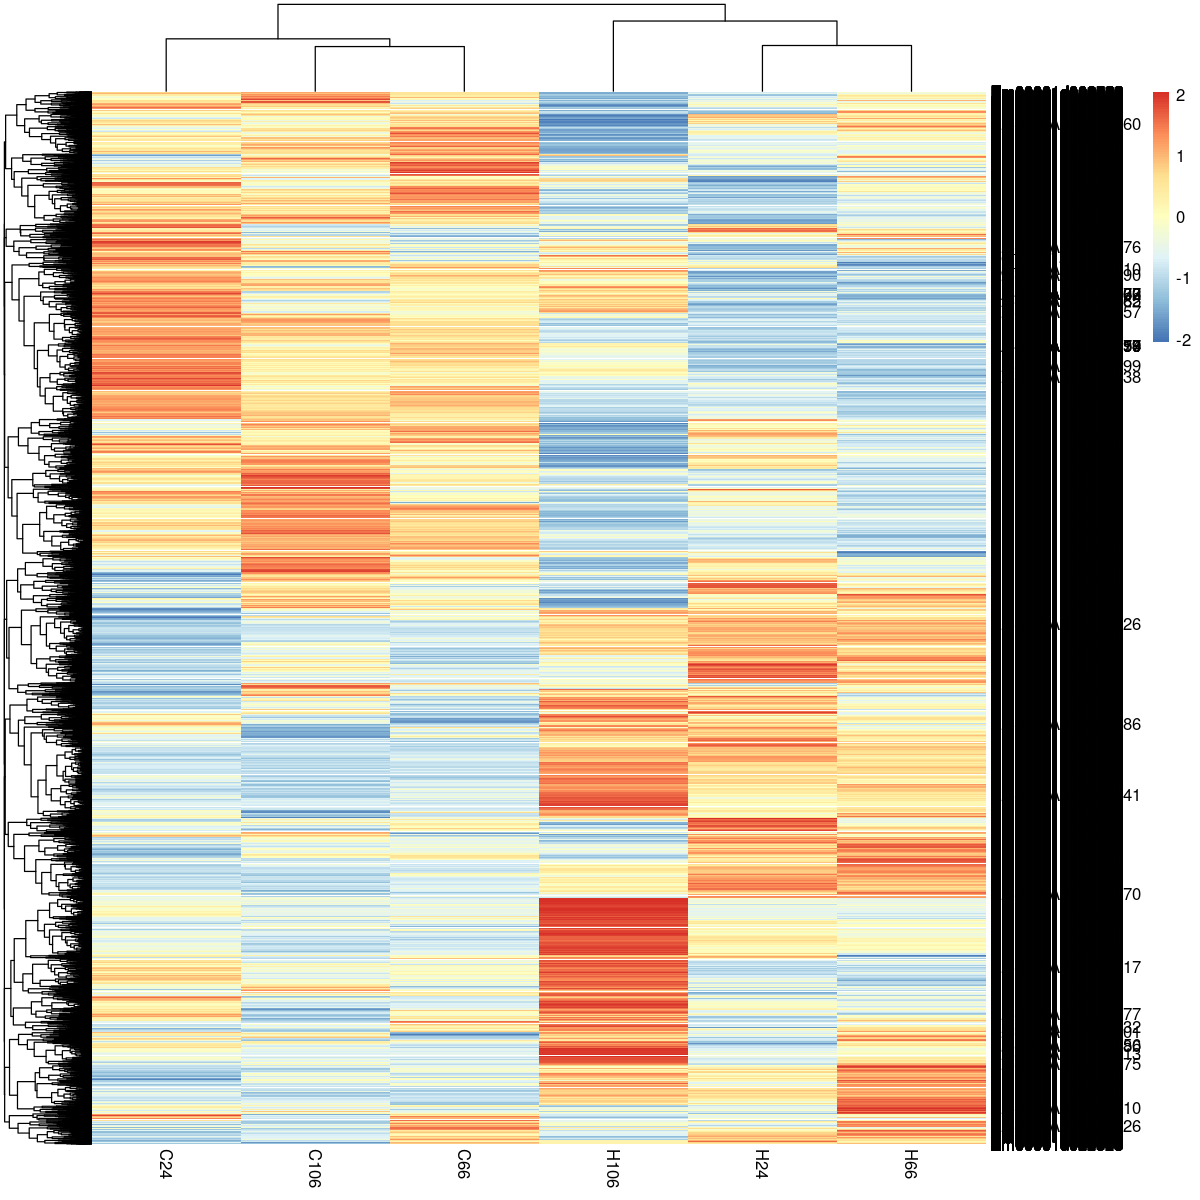

In [19]:
options(repr.plot.width=10, repr.plot.height=10)
library(pheatmap)
pheatmap(as.matrix(B73expfpm),scale="row")

,Feature,BN1,BN2,BN3,BN5,BH1,BH2,BH3,BH4,BH5
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSRNA049455608,0.8468365,4.7522212,5.4305446,1.6206911,4.8903681,10.0396121,4.571471,1.012239,8.378569
2,ENSRNA049456552,1.1795223,7.4428169,7.0038800,2.7731825,8.2399353,20.3520397,7.696273,1.674088,16.220051
3,ENSRNA049458448,0.5443949,0.8735701,0.1522583,0.7563225,0.8708875,2.1825244,2.198935,1.090104,1.235302
4,ENSRNA049458758,0.8165924,0.3494280,0.2537638,0.9724146,1.0718615,0.9275729,1.793868,1.051172,1.396428
5,ENSRNA049458826,2.1170913,1.8869113,1.1673133,3.4574743,1.6747836,1.8005826,2.141068,3.036718,2.578021
6,ENSRNA049458874,0.6351274,1.5025405,0.4060220,1.1164761,0.8708875,3.1100972,2.314669,1.129036,1.664972


,C106,C24,C66,H24,H66,H106,Feature
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1.5404341,1.6802473,2.2623443,1.2084191,2.098740,1.436424,ENSRNA049458826
2,1.4548545,2.3803504,1.4173723,1.0472965,1.385961,2.250398,ENSRNA049458957
3,2.1394919,3.8855720,1.7989726,0.8458934,1.900746,3.160133,ENSRNA049459076
4,1.1981154,1.1551700,1.6081724,1.2084191,1.544356,1.484305,ENSRNA049459101
5,0.5990577,0.8401237,0.8722291,0.6042095,1.108768,2.010994,ENSRNA049459132
6,2.5673902,2.9054277,2.0715442,0.8056127,1.979944,4.069869,ENSRNA049459156


,BN1,BN2,BN3,BN5,BH1,BH2,BH3,BH4,BH5,C106,C24,C66,H24,H66,H106
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.8468365,4.7522212,5.4305446,1.6206911,4.8903681,10.0396121,4.571471,1.012239,8.378569,NA,NA,NA,NA,NA,NA
2,1.1795223,7.4428169,7.0038800,2.7731825,8.2399353,20.3520397,7.696273,1.674088,16.220051,NA,NA,NA,NA,NA,NA
3,0.5443949,0.8735701,0.1522583,0.7563225,0.8708875,2.1825244,2.198935,1.090104,1.235302,NA,NA,NA,NA,NA,NA
4,0.8165924,0.3494280,0.2537638,0.9724146,1.0718615,0.9275729,1.793868,1.051172,1.396428,NA,NA,NA,NA,NA,NA
5,2.1170913,1.8869113,1.1673133,3.4574743,1.6747836,1.8005826,2.141068,3.036718,2.578021,1.540434,1.680247,2.262344,1.208419,2.09874,1.436424
6,0.6351274,1.5025405,0.4060220,1.1164761,0.8708875,3.1100972,2.314669,1.129036,1.664972,NA,NA,NA,NA,NA,NA


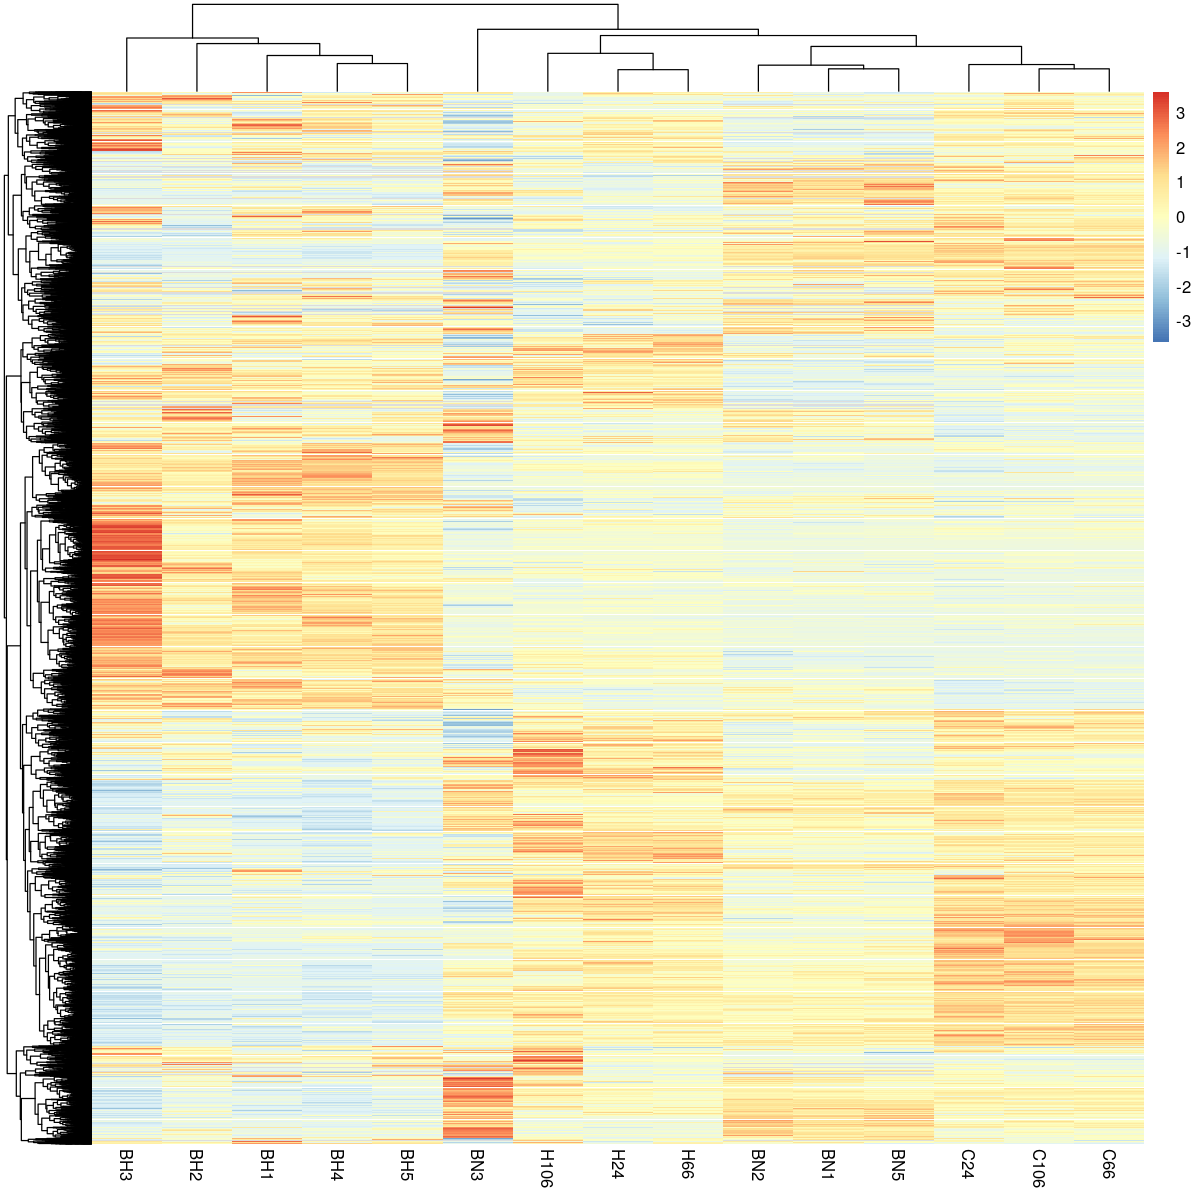

In [20]:
ppexpfpm = read.table("../../stress-experiment/ca20a3/ca20a3-B73v4-W22-Mo17index/2020AugReanalysis/CPMvalue/B73-CPM-Gene-expressed-heat-Aug.txt",head=T)
head(ppexpfpm)
B73 = B73expfpm %>% rownames_to_column(var="Gene") %>% 
    mutate(Feature= str_replace(Gene, "gene:", "")) %>% select(-Gene)
head(B73)
combine = ppexpfpm %>% left_join(B73, by="Feature") %>% select(-Feature)
combine1 = B73 %>% left_join(ppexpfpm, by="Feature") %>% select(-Feature)
library(pheatmap)
head(combine)
pheatmap(as.matrix(combine1),scale="row")

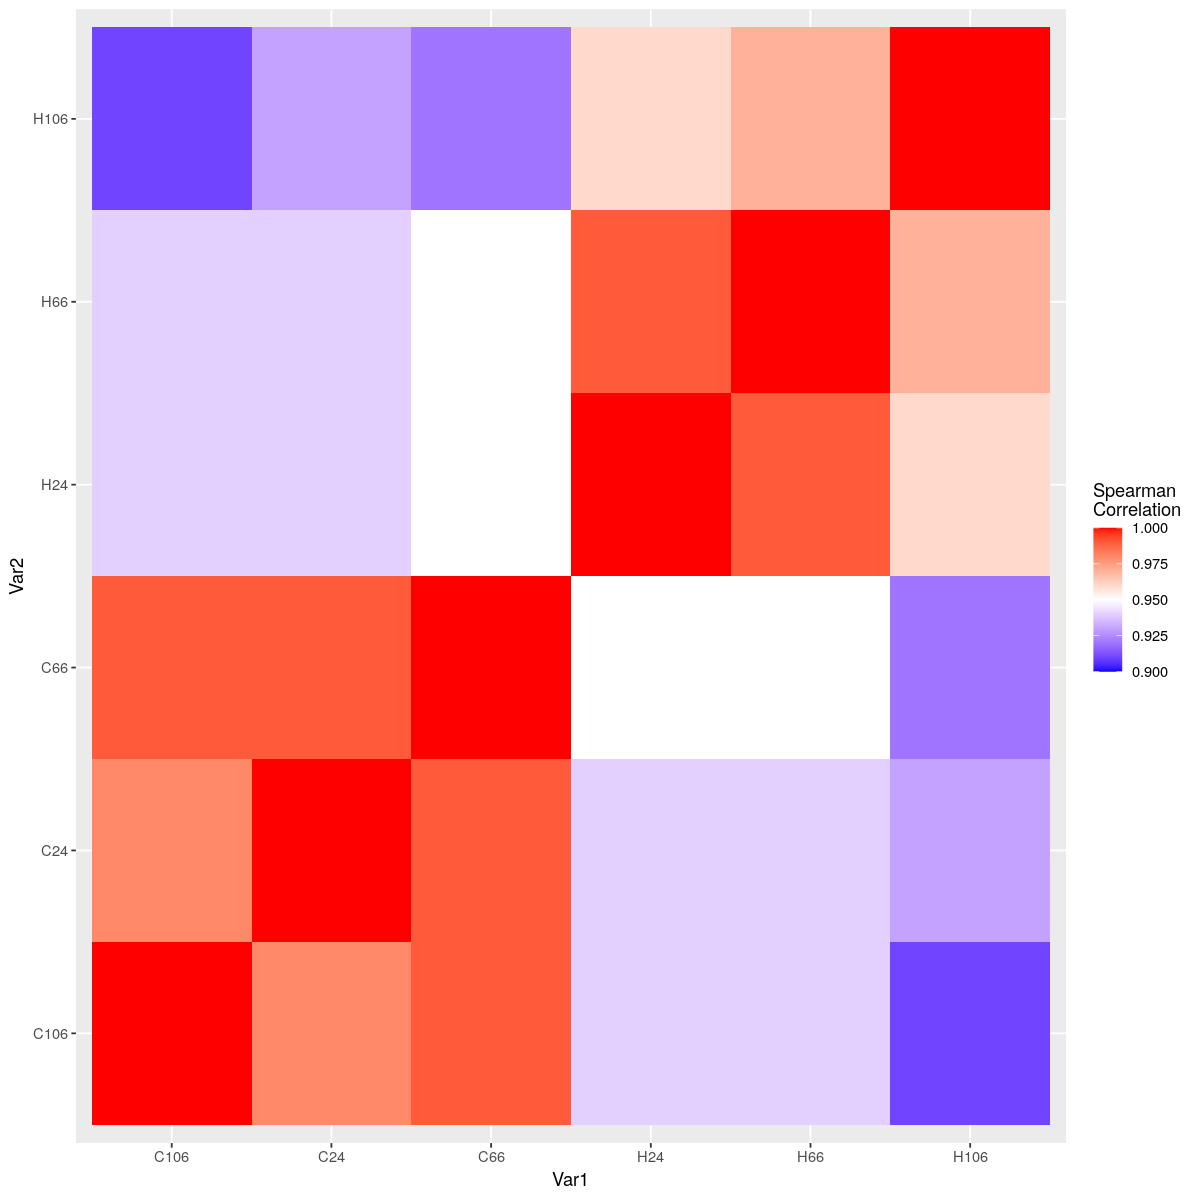

In [24]:
library(reshape2)
library(ggplot2)
melted_cormat <- melt(round(cor(B73expfpm, method="spearman"),2))
ggplot(data = melted_cormat, aes(x=Var1, y=Var2, fill=value)) +  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0.95, limit = c(0.9,1), space = "Lab", 
   name="Spearman\nCorrelation") + 
  geom_tile()

,Genotype,PC1,PC2,PC3
,<chr>,<dbl>,<dbl>,<dbl>
1,B73,-807.6857,12.17461,-92.38242
2,1538,-152.5630,-550.97257,-129.52343
3,2369,-620.2215,59.21440,-128.03807
4,2MA22,184.9471,126.85003,-69.75604
5,33-16,113.8054,52.38991,145.94461
6,3IJI1,239.7402,-945.91489,-118.74104


,Genotype,Group
,<fct>,<fct>
1,B73,stiff_stalk
2,1538,iodent
3,2369,stiff_stalk
4,29MIBZ2,iodent
5,2FACC,stiff_stalk
6,2FADB,stiff_stalk


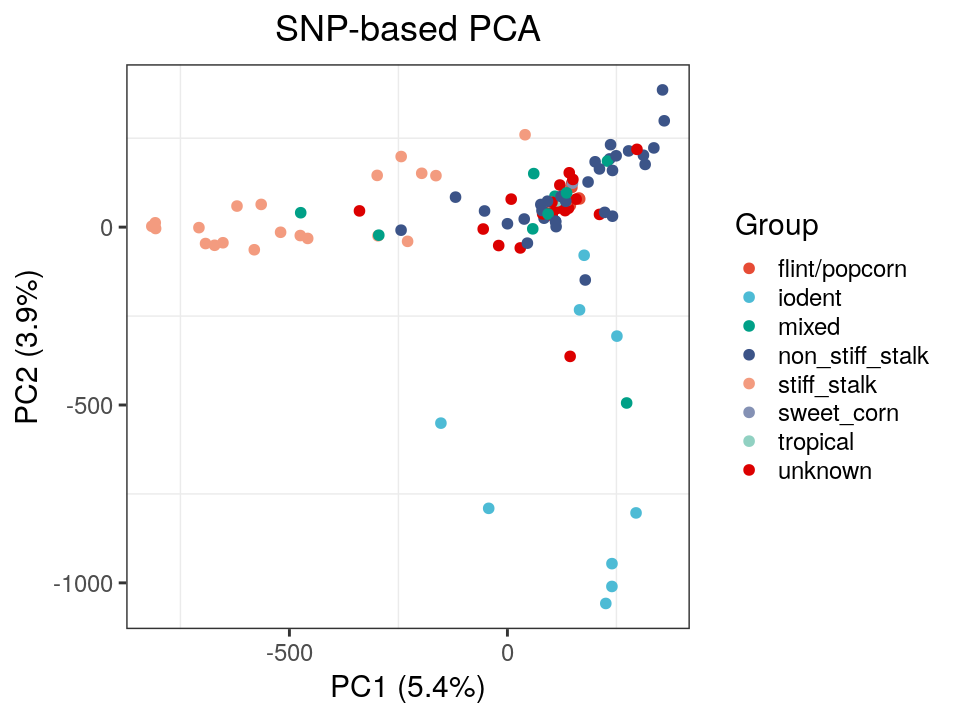

In [60]:
#=============================PCA analysis for both expression and SNP data====================#
#>>>>>>>>>>for SNP data>>>>>>>>>>>>>>>>>>>
library("ggsci")
mydata = read.table("PCAplot/Selected-102genos-Widiv-filtered-PCA.txt",sep=' ',head=T, check.names = FALSE)
mypc = mydata %>% rownames_to_column(var="Genotype") %>% select(Genotype, PC1, PC2, PC3)
head(mypc)
widiv = read.table("PCAplot/Widiv-Class-information.txt")
colnames(widiv) = c("Genotype","Group")
head(widiv)
combine = mypc %>% left_join(widiv, by="Genotype")
options(repr.plot.width=8, repr.plot.height=6)
ggscatter(combine, x = "PC1", y = "PC2", color="Group", size=2.6)+theme_bw(base_size = 18) + ggtitle("SNP-based PCA") + scale_color_npg()+
    theme(panel.grid.major=element_blank(),plot.title = element_text(hjust = 0.5)) + xlab("PC1 (5.4%)") + ylab("PC2 (3.9%)")

,Genotype,PC1,PC2,PC3
,<chr>,<dbl>,<dbl>,<dbl>
1,1538,-37.64039,120.529727,27.04700
2,2369,-133.28812,-10.512825,27.71957
3,2MA22,41.02397,-26.711815,16.70245
4,33-16,28.75488,-11.004417,-34.05351
5,3IJI1,52.01758,210.062907,29.20483
6,4226,24.91573,-8.228167,-48.01680


,Genotype,Group
,<fct>,<fct>
1,B73,stiff_stalk
2,1538,iodent
3,2369,stiff_stalk
4,29MIBZ2,iodent
5,2FACC,stiff_stalk
6,2FADB,stiff_stalk


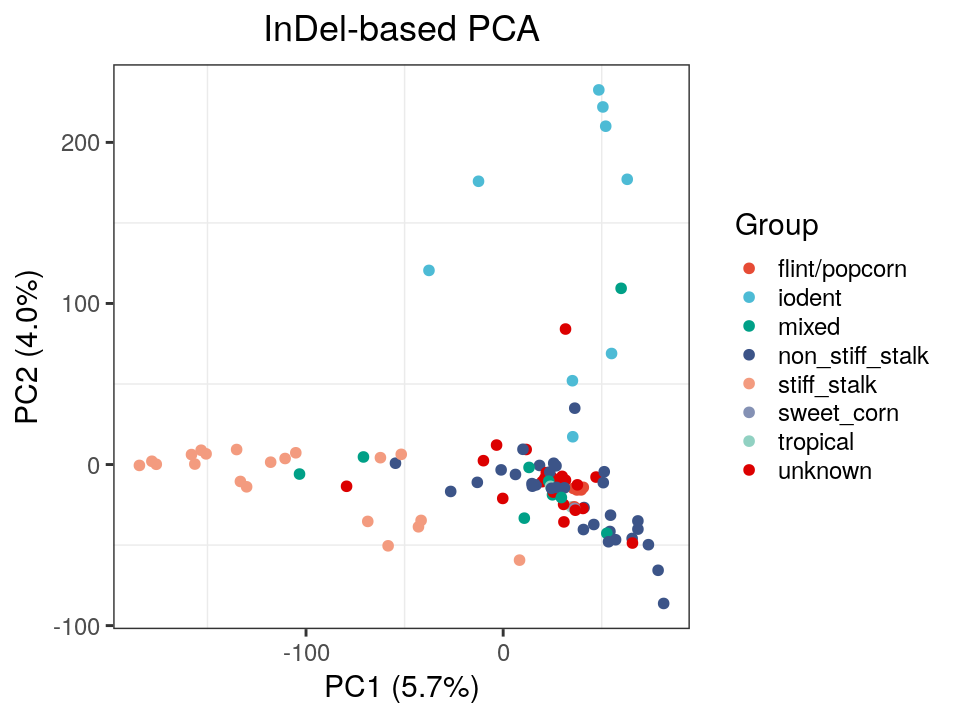

In [102]:
#>>>>>>>>>>for InDel data>>>>>>>>>>>>>>>>>>>
mydata = read.table("PCAplot/Selected-102genos-Widiv-Indelcall-filtered-PCA.txt",sep=' ',head=T, check.names = FALSE)
mypc = mydata %>% rownames_to_column(var="Genotype") %>% select(Genotype, PC1, PC2, PC3)
head(mypc)
widiv = read.table("PCAplot/Widiv-Class-information.txt")
colnames(widiv) = c("Genotype","Group")
head(widiv)
combine = mypc %>% left_join(widiv, by="Genotype")
options(repr.plot.width=8, repr.plot.height=6)
ggscatter(combine, x = "PC1", y = "PC2", color="Group", size=2.6)+theme_bw(base_size = 18) + ggtitle("InDel-based PCA") + scale_color_npg()+
    theme(panel.grid.major=element_blank(),plot.title = element_text(hjust = 0.5)) + xlab("PC1 (5.7%)") + ylab("PC2 (4.0%)")

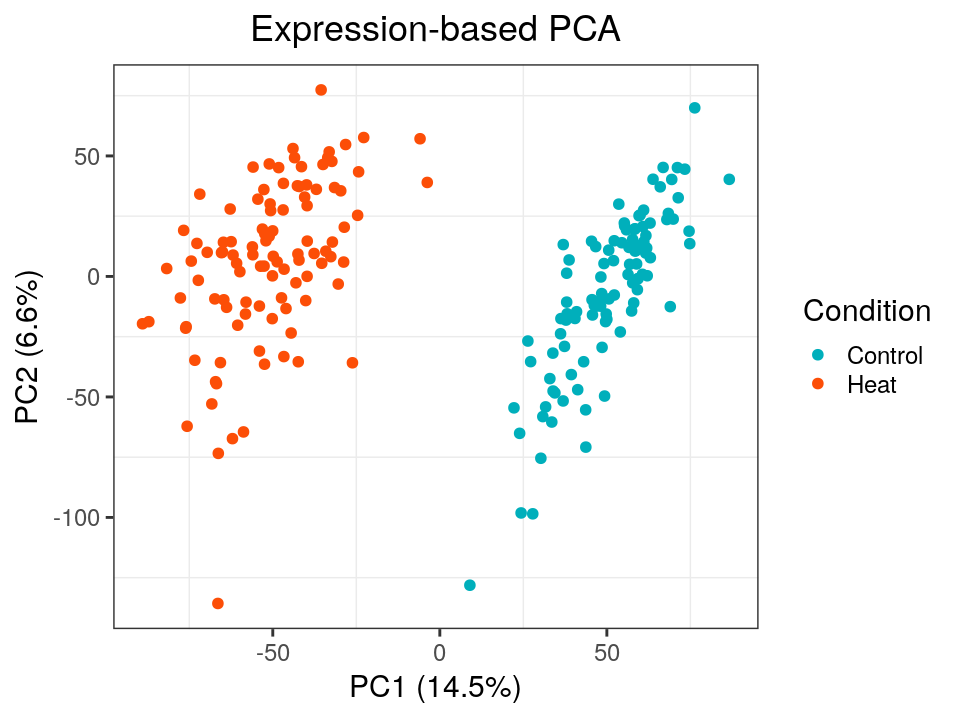

In [99]:
#>>>>>>>>>>>>>>For expression data>>>>>>>>>>>>>>>>
tmp = totalfpmcount[rowMeans(totalfpmcount) > 1,]
expfpm = tmp %>% rownames_to_column(var="Feature") %>% filter(!Feature %in% c("C24","H24","C106","H106")) %>% column_to_rownames(var="Feature")
fit = prcomp(t(log2(expfpm+1)), scale=TRUE)
write.table(fit$x[,c(1,2,3)], file="PCAplot/Selected-102genos-Widiv-filtered-PCA-first3PC.txt")
b73 = c("C106", "C24", "C66", "H106", "H24", "H66")
colnames(meta)[1] = "Feature"
mypc = data.frame(fit$x[,c(1,2,3)]) %>% rownames_to_column(var="Feature") %>% 
    mutate(Condition= ifelse(grepl("C",Feature),"Control","Heat")) 
options(repr.plot.width=8, repr.plot.height=6)
ggscatter(mypc, x = "PC1", y = "PC2", color="Condition", palette = c("#00AFBB", "#FC4E07"),size=2.6)+theme_bw(base_size = 18) + ggtitle("Expression-based PCA") + 
    theme(panel.grid.major=element_blank(),plot.title = element_text(hjust = 0.5)) + xlab("PC1 (14.5%)") + ylab("PC2 (6.6%)")
#ggscatter(mypc, x = "PC1", y = "PC2", color="Group", size = 2)+ scale_color_brewer(palette="Set1")+theme_bw(base_size = 16) + ggtitle("Selected Widiv PCA") + 
#    theme(panel.grid.major=element_blank(),plot.title = element_text(hjust = 0.5)) + xlab("PC1 (3.7%)") + ylab("PC2 (2.6%)")

,Feature,PC1,PC2,PC3,stress,newstress,Genotype,Condition,Group
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<fct>,<fct>
1,C01,-31.24656,76.223985,-22.107352,Control,Control,1538,Control,iodent
2,C02,-44.66360,54.189381,38.307269,Control,Control,2369,Control,stiff_stalk
3,C03,-38.60739,10.292181,-29.518836,Control,Control,2MA22,Control,non_stiff_stalk
4,C04,-66.93593,-46.790421,2.925620,Control,Control,33-16,Control,unknown
5,C05,-58.63152,10.847137,-56.542273,Control,Control,3IJI1,Control,iodent
6,C06,-39.29876,-7.484761,4.866179,Control,Control,4226,Control,unknown


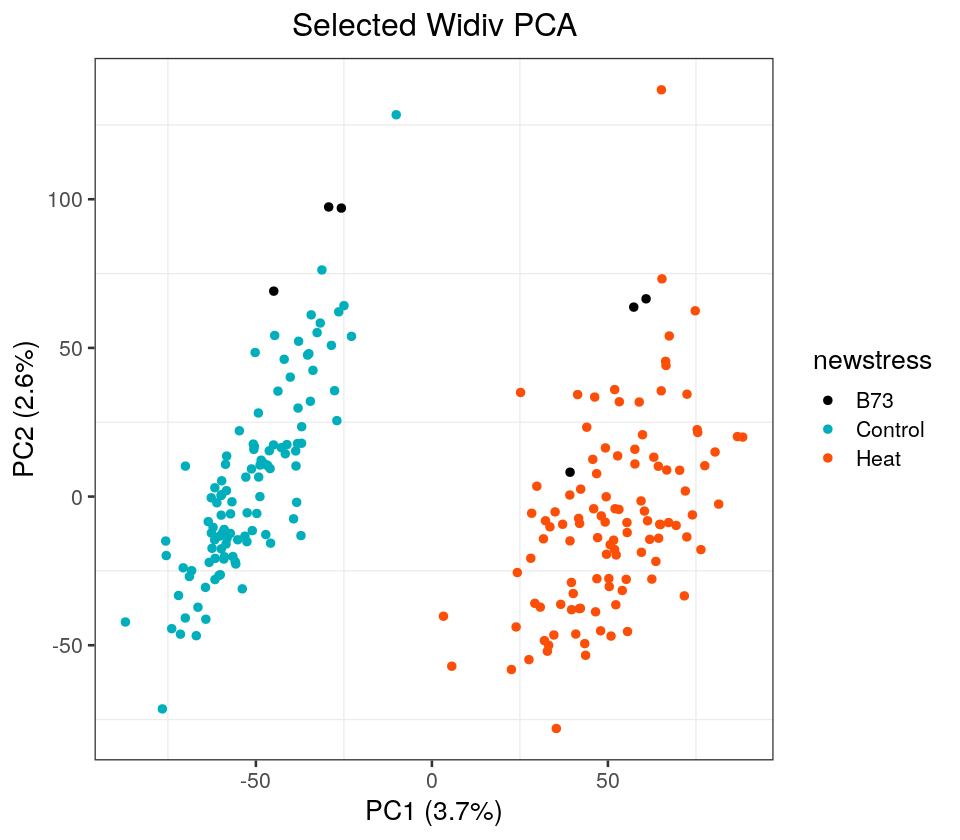

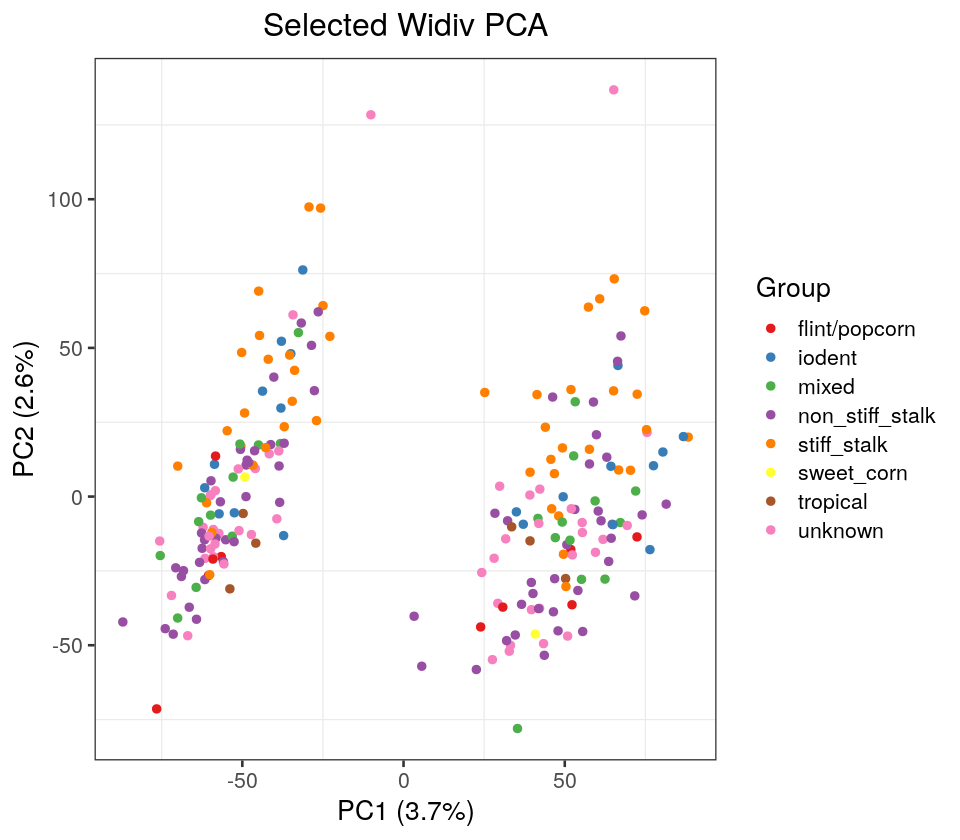

In [25]:
b73 = c("C106", "C24", "C66", "H106", "H24", "H66")
colnames(meta)[1] = "Feature"
mypc = data.frame(fit$x[,c(1,2,3)]) %>% rownames_to_column(var="Feature") %>% 
    mutate(stress= ifelse(grepl("C",Feature),"Control","Heat")) %>% mutate(newstress = ifelse(Feature %in% b73, "B73", stress)) %>% left_join(meta, by="Feature")
head(mypc)
options(repr.plot.width=8, repr.plot.height=7)
ggscatter(mypc, x = "PC1", y = "PC2", color="newstress", palette = c("black", "#00AFBB", "#FC4E07"))+theme_bw(base_size = 16) + ggtitle("Selected Widiv PCA") + 
    theme(panel.grid.major=element_blank(),plot.title = element_text(hjust = 0.5)) + xlab("PC1 (3.7%)") + ylab("PC2 (2.6%)")
ggscatter(mypc, x = "PC1", y = "PC2", color="Group", size = 2)+ scale_color_brewer(palette="Set1")+theme_bw(base_size = 16) + ggtitle("Selected Widiv PCA") + 
    theme(panel.grid.major=element_blank(),plot.title = element_text(hjust = 0.5)) + xlab("PC1 (3.7%)") + ylab("PC2 (2.6%)")

In [12]:
wg = read.table("B73-Widiv-DE-Heat-gene.txt",sep=' ',head=T)
pg = read.table("B73-PP-DE-Heat-gene.txt",sep=' ',head=T)

In [13]:
wgde = wg %>% filter(abs(log2FoldChange) > 1 & padj < 0.05) %>% rownames_to_column(var="Feature")
pgde = pg %>% filter(abs(log2FoldChange) > 1 & padj < 0.05)
length(wgde$Feature)
length(pgde$Feature)
length(intersect(wgde$Feature, pgde$Feature))

[1] 235

[1] 7131

[1] 0

In [113]:
control$SampleID
total_newfpm = fpmcount %>% rownames_to_column(var="Feature") %>% mutate(gene= str_replace(Feature, "gene:", "")) %>% 
    select(-Feature) %>% filter(gene %in% hsf) %>% column_to_rownames(var="gene")
control_newfpm = fpmcount %>% rownames_to_column(var="Feature") %>% mutate(gene= str_replace(Feature, "gene:", "")) %>% 
    select(-Feature) %>% filter(gene %in% hsf) %>% column_to_rownames(var="gene") %>% select(control$SampleID) 
head(control_newfpm)
#%>% mutate(mymean = rowMeans(select(.,control$SampleID))) %>% filter(mymean != 0) %>% select(-mymean)
heat_newfpm = fpmcount %>% rownames_to_column(var="Feature") %>% mutate(gene= str_replace(Feature, "gene:", "")) %>% 
    select(-Feature) %>% filter(gene %in% hsf) %>% column_to_rownames(var="gene") %>% select(heat$SampleID) 
head(heat_newfpm)

[1] C01  C02  C03  C04  C05  C06  C07  C09  C10  C100 C101 C102 C103 C104 C105
 [16] C106 C107 C108 C109 C11  C110 C111 C112 C113 C114 C115 C116 C117 C118 C119
 [31] C12  C120 C13  C14  C15  C16  C17  C18  C19  C20  C21  C22  C23  C24  C25 
 [46] C27  C28  C29  C30  C31  C32  C33  C34  C35  C36  C37  C38  C39  C40  C41 
 [61] C42  C44  C46  C47  C48  C49  C50  C51  C52  C53  C54  C55  C56  C57  C58 
 [76] C59  C60  C61  C62  C64  C65  C66  C67  C68  C71  C72  C73  C74  C75  C76 
 [91] C77  C78  C79  C80  C81  C82  C83  C84  C85  C86  C87  C89  C91  C92  C93 
[106] C94  C95  C96  C97  C98  C99 
224 Levels: C01 C02 C03 C04 C05 C06 C07 C09 C10 C100 C101 C102 C103 ... H99

,C01,C02,C03,C04,C05,C06,C07,C09,C10,C100,⋯,C89,C91,C92,C93,C94,C95,C96,C97,C98,C99
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Zm00001d005843,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,⋯,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
Zm00001d005888,0.000000,0.000000,0.000000,0.00000,3.738081,0.000000,0.000000,0.000000,0.000000,0.00000,⋯,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3.351031,0.000000,0.000000,0.00000
Zm00001d010812,38.025374,12.472208,4.378297,13.75812,11.214243,2.880811,4.493883,2.226175,1.999237,18.48214,⋯,30.270011,2.074379,3.973408,3.832396,42.88625,11.498910,25.132734,1.907949,10.038582,27.14779
Zm00001d011406,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,⋯,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
Zm00001d012749,5.633389,1.385801,0.000000,0.00000,0.000000,0.000000,13.481650,0.000000,0.000000,0.00000,⋯,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,6.702062,0.000000,6.023149,0.00000
Zm00001d012823,5.633389,4.157403,16.418613,53.31272,11.214243,0.000000,51.679660,15.583226,0.000000,16.17187,⋯,3.783751,0.000000,0.000000,19.161978,13.64563,9.199128,15.079640,0.000000,6.023149,0.00000


,H01,H02,H03,H04,H05,H06,H07,H09,H10,H100,⋯,H89,H91,H92,H93,H94,H95,H96,H97,H98,H99
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Zm00001d005843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,⋯,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000,0.000000
Zm00001d005888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,⋯,0.000000,1.695654,0.00000,0.000000,0.00000,1.801725,0.00000,0.000000,1.616,1.755191
Zm00001d010812,90.344470,26.502929,36.639854,47.465345,19.718543,35.478189,6.461234,3.806656,10.27163,7.837163,⋯,53.562769,49.173957,23.14967,32.589620,33.44154,48.646572,23.55278,42.515034,19.392,10.531144
Zm00001d011406,0.000000,0.000000,0.000000,0.000000,6.572848,0.000000,0.000000,0.000000,0.00000,0.000000,⋯,0.000000,1.695654,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000,0.000000
Zm00001d012749,7.227558,0.000000,10.991956,4.746535,0.000000,0.000000,8.614979,5.709985,0.00000,0.000000,⋯,0.000000,0.000000,0.00000,5.431603,0.00000,7.206900,13.45873,9.242399,0.000,0.000000
Zm00001d012823,19.875783,1.656433,9.159963,168.501976,34.507450,7.095638,49.536129,28.549924,20.54326,27.430070,⋯,7.047733,39.000035,16.83612,50.694965,63.36293,66.663821,43.74088,27.727196,29.088,10.531144


In [40]:
SRhsf = read.table("HSFs/SRHSF-table.tsv",sep='\t',head=F)
head(SRhsf)
colnames(SRhsf)[2] = "Gene"
hsf = SRhsf[,c(1,2)]
head(hsf)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
,<fct>,<fct>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<fct>
1,ZmHsf12,Zm00001d012823,5,925235,928518,556,60690.43,5.32,3,2,nucleus
2,ZmHsf06,Zm00001d034886,1,304715056,304719918,528,56724.50,5.11,2,1,nucleus
3,ZmHsf26,Zm00001d033987,1,280368696,280370932,372,41282.08,5.12,2,1,nucleus
4,ZmHsf17,Zm00001d018941,7,9991664,9995513,376,42043.73,4.70,2,1,nucleus
5,ZmHsf04,Zm00001d032923,1,243208029,243211663,358,40502.49,4.99,2,1,nucleus
6,ZmHsf01,Zm00001d027757,1,12714065,12716389,385,43268.46,5.30,2,1,nucleus


,V1,Gene
,<fct>,<fct>
1,ZmHsf12,Zm00001d012823
2,ZmHsf06,Zm00001d034886
3,ZmHsf26,Zm00001d033987
4,ZmHsf17,Zm00001d018941
5,ZmHsf04,Zm00001d032923
6,ZmHsf01,Zm00001d027757


In [48]:
df <- data.frame(x=abs(rnorm(50)),id1=rep(1:5,10), id2=rep(1:2,25))
df <- tbl_df(df)
res <- df %>% group_by(id1) %>% 
       do(w = wilcox.test(x~id2, data=., paired=FALSE)) %>% 
       summarise(id1, Wilcox = w$p.value)

Warning message:
“`tbl_df()` was deprecated in dplyr 1.0.0.
Please use `tibble::as_tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


x,id1,id2
<dbl>,<int>,<int>
0.312970061,1,1
0.339839623,2,2
0.628559287,3,1
1.443130515,4,2
0.824263813,5,1
0.146746465,1,2
0.697060216,2,1
1.309770424,3,2
0.342287020,4,1


In [55]:
x <- c(1.83,  0.50,  1.62,  2.48, 1.68, 1.88, 1.55, 3.06, 1.30)
y <- c(0.878, 0.647, 0.598, 2.05, 1.06, 1.29, 1.06, 3.14, 1.29)
fit = wilcox.test(x, y, paired = TRUE)

In [60]:
fit$alternative

[1] "two.sided"

,Gene,Treatment,CPM,Real
,<chr>,<chr>,<dbl>,<chr>
1,ENSRNA049458957,C01,1.4258540,Control
2,ENSRNA049459076,C01,2.0595668,Control
3,ENSRNA049459101,C01,1.4575396,Control
4,ENSRNA049459156,C01,1.8694530,Control
5,ENSRNA049463813,C01,0.6337129,Control
6,ENSRNA049465110,C01,1.1089975,Control


`summarise()` has ungrouped output. You can override using the `.groups` argument.



Gene,Wilcox,Control,Heat,FC
<chr>,<dbl>,<dbl>,<dbl>,<chr>
ENSRNA049478167,2.969233e-23,10.808859,3.317874,Control
ENSRNA049478576,1.002798e-21,6.722989,2.176348,Control
ENSRNA049478756,3.182365e-23,8.473551,2.364661,Control
ENSRNA049479033,7.276115e-12,20.801921,7.354850,Control
ENSRNA049479579,5.743780e-21,3.940380,1.139701,Control
ENSRNA049479581,2.296386e-10,6.463491,2.934949,Control


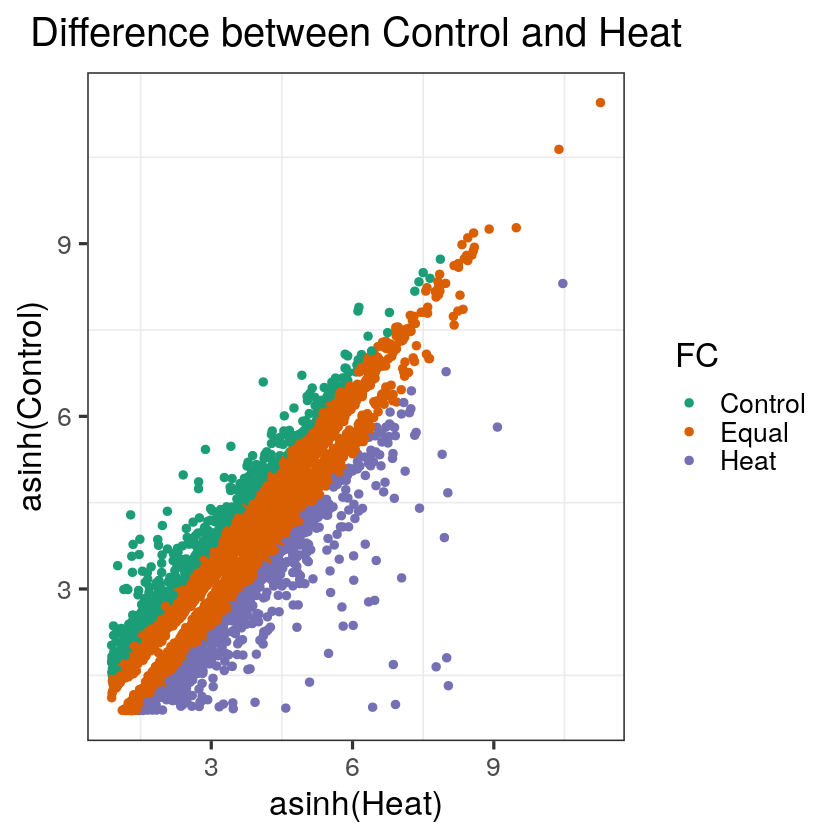

In [3]:
library(ggplot2)
exp = read.table("Widiv-CPM-expressed-gene.txt",sep=' ',head=T)
exp = exp %>% rownames_to_column(var="Gene")
combine = exp %>% gather(key="Treatment",value="CPM", -Gene)
combine1 = combine %>% mutate(Real = ifelse(startsWith(Treatment, "C"),"Control","Heat")) %>% drop_na()
head(combine1)
x1 = combine1 %>% group_by(Gene) %>% 
       do(w = wilcox.test(CPM~Real, data=., paired=FALSE)) %>% 
       summarise(Gene, Wilcox = w$p.value) %>% ungroup()
x2 = combine1 %>% group_by(Gene, Real) %>% mutate(Mymean=mean(CPM)) %>% ungroup() %>% 
    select(Gene, Mymean, Real) %>% distinct() %>% spread(Real, Mymean)
combine2 = x1 %>% left_join(x2, by="Gene")

test = combine2 %>% filter(Wilcox < (0.05/19472), Heat >= 1, Control >= 1) %>% 
    mutate(FC=ifelse(Control > 2*Heat, "Control", 
                     ifelse(Heat > 2*Control, "Heat", "Equal")))
head(test)
ggplot(test, aes(x=asinh(Heat), y=asinh(Control), color=FC)) + scale_color_brewer(palette="Dark2")+
  geom_point(size=2) + theme_bw(base_size = 20) + ggtitle("Difference between Control and Heat") + 
    theme(panel.grid.major=element_blank(),plot.title = element_text(hjust = 0.5))

In [7]:
heatdata = test %>% filter(FC == 'Heat')
write.table(heatdata, file="Heat-higherexpressed-gene.txt")

In [72]:
syn = read.table("Syntenic/maize-syntenic-gene.txt",head=F)

In [75]:
cg = test %>% filter(FC == 'Control') %>% select(Gene)
hg = test %>% filter(FC == 'Heat') %>% select(Gene)
length(cg$Gene)
length(hg$Gene)
length(intersect(cg$Gene, syn$V1))
length(intersect(hg$Gene, syn$V1))

[1] 565

[1] 701

[1] 312

[1] 407

In [77]:
312/565; 407/701

[1] 0.5522124

[1] 0.5805991

In [71]:
B73 = c("C24","C66","C106","H24","H66","H106")
exp = read.table("Widiv-CPM-expressed-gene.txt",sep=' ',head=T)
head(exp)
exp = exp %>% rownames_to_column(var="Gene") %>% filter(Gene %in% hg$Gene) %>% select(-C24,-C106,-H24,-H106) %>%
    column_to_rownames(var="Gene")
myt = prcomp(t(exp),scale=T,center=T)
write.table(file="701heatgene-PC123.csv",myt$x[,c(1,2,3)], sep=',')

,C01,C02,C03,C04,C05,C06,C07,C09,C10,C100,⋯,H87,H89,H91,H92,H93,H95,H96,H97,H98,H99
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSRNA049458957,1.4258540,2.9574780,2.8948215,0.9957748,2.518353,0.65059473,0.3881032,3.0441321,1.3254424,0.8210651,⋯,1.0076072,1.9983064,0.4761254,0.1018118,0.8068001,1.7614579,1.4775020,0.9423133,1.0332823,0.7153993
ENSRNA049459076,2.0595668,3.7276545,3.6250468,2.0368120,3.597647,0.65059473,0.5544331,2.2964505,1.1426228,0.7115897,⋯,0.7557054,2.3313575,0.5158025,0.5090592,0.5826890,1.5412757,1.6006272,0.4916417,0.8345742,0.8942491
ENSRNA049459101,1.4575396,1.7868096,2.9469805,1.8557621,2.203558,0.78071368,0.3326598,1.1749282,0.7312786,0.4926390,⋯,0.5038036,1.6652553,0.5158025,0.2545296,1.5239558,0.6165103,1.3133351,0.1229104,0.6756077,0.6706868
ENSRNA049459156,1.8694530,3.9433040,3.5468084,3.7567866,2.923088,2.08190315,0.8870929,3.7384078,0.9140982,1.3137041,⋯,0.9446318,2.4978830,0.7141880,0.2545296,0.5378668,2.4220047,1.2722934,1.2291043,1.2717321,1.2072363
ENSRNA049463813,0.6337129,0.2464565,0.1043179,0.8599873,0.539647,0.06505947,0.0000000,0.7476816,0.2742295,0.6021144,⋯,0.9446318,4.9624609,2.6980437,0.1527178,0.6275112,0.0000000,6.2793836,0.2867910,1.2717321,5.6784817
ENSRNA049465110,1.1089975,1.8484237,2.1385168,3.8925741,1.843794,2.66743841,2.7167221,2.6702913,1.0969179,1.5326548,⋯,0.5352913,0.5661868,0.5554796,0.4581533,0.5826890,0.4403645,0.4514589,0.4506716,0.3576746,0.2235623


In [59]:
tcgexp$x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102
C01,-11.6144538,9.2672585,7.76870809,-0.049938425,2.1460756,-1.705910323,0.1198289,-0.7004615,4.59810072,-0.15364906,⋯,-0.02574735,-0.43036253,0.431801355,0.139150409,-1.51363043,0.161490741,-0.97526646,0.8346565813,-0.173923554,-6.709910e-15
C02,-6.2066116,0.8128507,5.69611301,2.153663163,1.3043344,5.974344429,-0.4383548,-2.1843155,1.45302438,0.18034405,⋯,-2.04862757,0.96943343,1.365016934,1.385499515,-3.70536155,-0.669948096,-2.80937904,-1.6495235092,-0.319923128,-3.164136e-15
C03,-6.0431891,-3.3133279,-4.42183289,-1.330814717,2.6594603,0.409947799,-0.4267197,-0.5780852,-1.28423610,-1.90533942,⋯,0.80346851,-0.94774930,0.568289045,-0.209709834,0.85175289,0.714894489,0.35601857,-0.6705658349,0.378556738,-2.900458e-15
C04,4.3348903,-9.9152946,-7.46668548,5.086297432,-5.9492472,-2.206363154,-0.7869057,1.1170345,4.55521078,0.21280872,⋯,0.81476408,-0.57594035,0.216983520,0.843997546,-0.70045923,0.221428059,0.03940691,-0.0981919406,-0.162681657,-9.714451e-16
C05,3.5151511,7.7999478,-1.56289520,-8.467298799,8.9683922,-1.806329340,5.2764375,0.0933753,9.67033873,-2.86447232,⋯,1.67178765,-0.01013372,-1.179882536,-0.081277211,2.87449401,1.125988246,0.18610410,0.6159335698,0.122615022,-3.851086e-15
C06,-1.6939439,-5.3966378,-4.60824387,-1.127961886,-0.3502894,-0.419776157,-3.2327755,-2.9074438,2.26001508,-0.38663560,⋯,0.67547300,2.51398241,2.067335880,0.183100079,-0.82862395,0.252321844,0.49009833,0.5592367841,0.364783742,-5.524661e-15
C07,-1.8151867,-8.9488818,-7.53114772,0.721326068,-3.0669335,3.878628830,-0.2421566,0.2286970,5.11728980,-1.40427740,⋯,0.12598110,-0.62933657,-0.451108194,-1.126997177,0.31115447,-0.795898600,0.29196605,0.2223206287,0.066918298,-5.405398e-15
C09,10.9839345,10.2459314,-6.48841373,-1.466870207,-2.9708037,1.174191012,2.4184494,-1.3529887,1.75729320,6.04270829,⋯,-0.92709523,-1.67581359,0.003409993,1.142972378,0.70593872,-0.153640694,-0.18330336,-0.3098620798,-0.202044948,-1.474515e-15
C10,-6.1237401,3.9305073,0.46497788,3.084269536,-1.9596817,8.481890030,-1.6155255,-1.5772622,-1.10824655,-0.05577502,⋯,0.68698575,-0.77552997,-3.461956243,0.503472329,2.42057817,1.385982604,-1.69465459,-0.8269097454,-0.265206365,-1.829266e-15
C100,-4.8873999,-3.8216940,4.31474591,-4.434179375,-0.5497229,-4.447724053,-0.4528915,-1.7953656,2.52569248,1.13525246,⋯,1.49072437,0.49112477,1.249306459,0.583239259,0.59844096,1.140785347,1.20485516,-0.2311113603,0.123945595,-3.629042e-15


In [37]:
# Ka/Ks analysis

kaks = read.table("KaKs/maizeAGPv4-kaks.tsv",sep='\t',head=F)
cgk = kaks %>% filter(V1 %in% cg$Gene) %>% mutate(Condition = "Control")
hgk = kaks %>% filter(V1 %in% hg$Gene) %>% mutate(Condition = "Heat")
comb = data.frame(rbind(cgk, hgk))
p <- ggplot(comb, aes(x=Condition, y=V2)) + 
  geom_violin()
wilcox.test(cgk$V2, hgk$V2)


	Wilcoxon rank sum test with continuity correction

data:  cgk$V2 and hgk$V2
W = 105419, p-value = 0.3954
alternative hypothesis: true location shift is not equal to 0


,C106,C24,C66,H24,H66,H106
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSRNA049453582,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.00000000
ENSRNA049453693,0.00000000,0.0000000,0.02725716,0.00000000,0.03959887,0.04788081
ENSRNA049453717,0.00000000,0.0000000,0.00000000,0.08056127,0.03959887,0.00000000
ENSRNA049453841,0.04278984,0.0000000,0.02725716,0.00000000,0.00000000,0.00000000
ENSRNA049454125,0.04278984,0.2100309,0.10902864,0.08056127,0.15839549,0.09576162
ENSRNA049454254,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.00000000


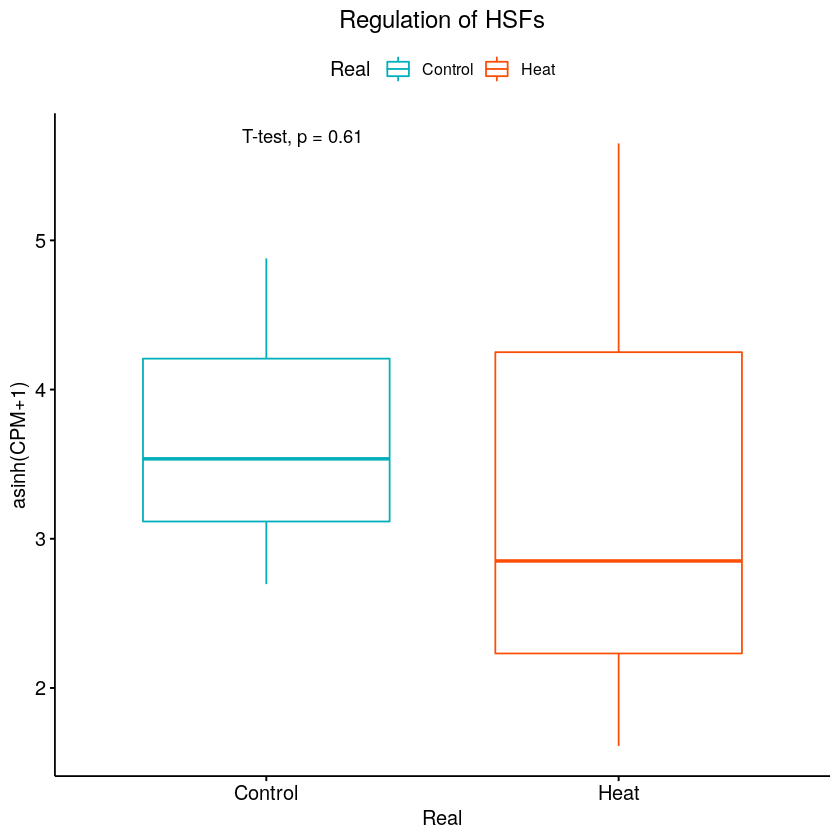

In [87]:
exp = read.table("Heatstresspanel-B73-CPM.txt",sep=' ',head=T)
head(exp)
exp = exp %>% rownames_to_column(var="Gene") %>% filter(Gene == "Zm00001d046234") %>% 
    gather(key="Treatment",value="CPM",-Gene) %>% mutate(Real = ifelse(startsWith(Treatment, "C"),"Control","Heat"))
ggboxplot(exp, "Real", "CPM", color = "Real", scales = "free", palette = c("#00AFBB", "#FC4E07")) + 
    stat_compare_means(paired = TRUE, method = "t.test") + ggtitle("Regulation of HSFs") + 
    theme(panel.grid.major=element_blank(),plot.title = element_text(hjust = 0.5)) + ylab("asinh(CPM+1)")

In [79]:
exp = read.table("Widiv-CPM-expressed-gene.txt",sep=' ',head=T)
exp = exp %>% rownames_to_column(var="Gene")
combine = hsf %>% left_join(exp, by="Gene")
colnames(combine)[1] = "HSF"
dim(combine)

ERROR: Error in left_join(., exp, by = "Gene"): object 'hsf' not found


,HSF,Gene,Treatment,CPM
,<fct>,<chr>,<chr>,<dbl>
1,ZmHsf12,Zm00001d012823,C01,20.8808390
2,ZmHsf06,Zm00001d034886,C01,55.4498760
3,ZmHsf26,Zm00001d033987,C01,0.1901139
4,ZmHsf17,Zm00001d018941,C01,10.7731188
5,ZmHsf04,Zm00001d032923,C01,29.3409058
6,ZmHsf01,Zm00001d027757,C01,32.0341855


,HSF,Gene,Treatment,CPM,Real,novel
,<fct>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,ZmHsf12,Zm00001d012823,C01,20.8808390,Control,3.779280
2,ZmHsf06,Zm00001d034886,C01,55.4498760,Control,4.726579
3,ZmHsf26,Zm00001d033987,C01,0.1901139,Control,1.009629
4,ZmHsf17,Zm00001d018941,C01,10.7731188,Control,3.160765
5,ZmHsf04,Zm00001d032923,C01,29.3409058,Control,4.105915
6,ZmHsf01,Zm00001d027757,C01,32.0341855,Control,4.190919


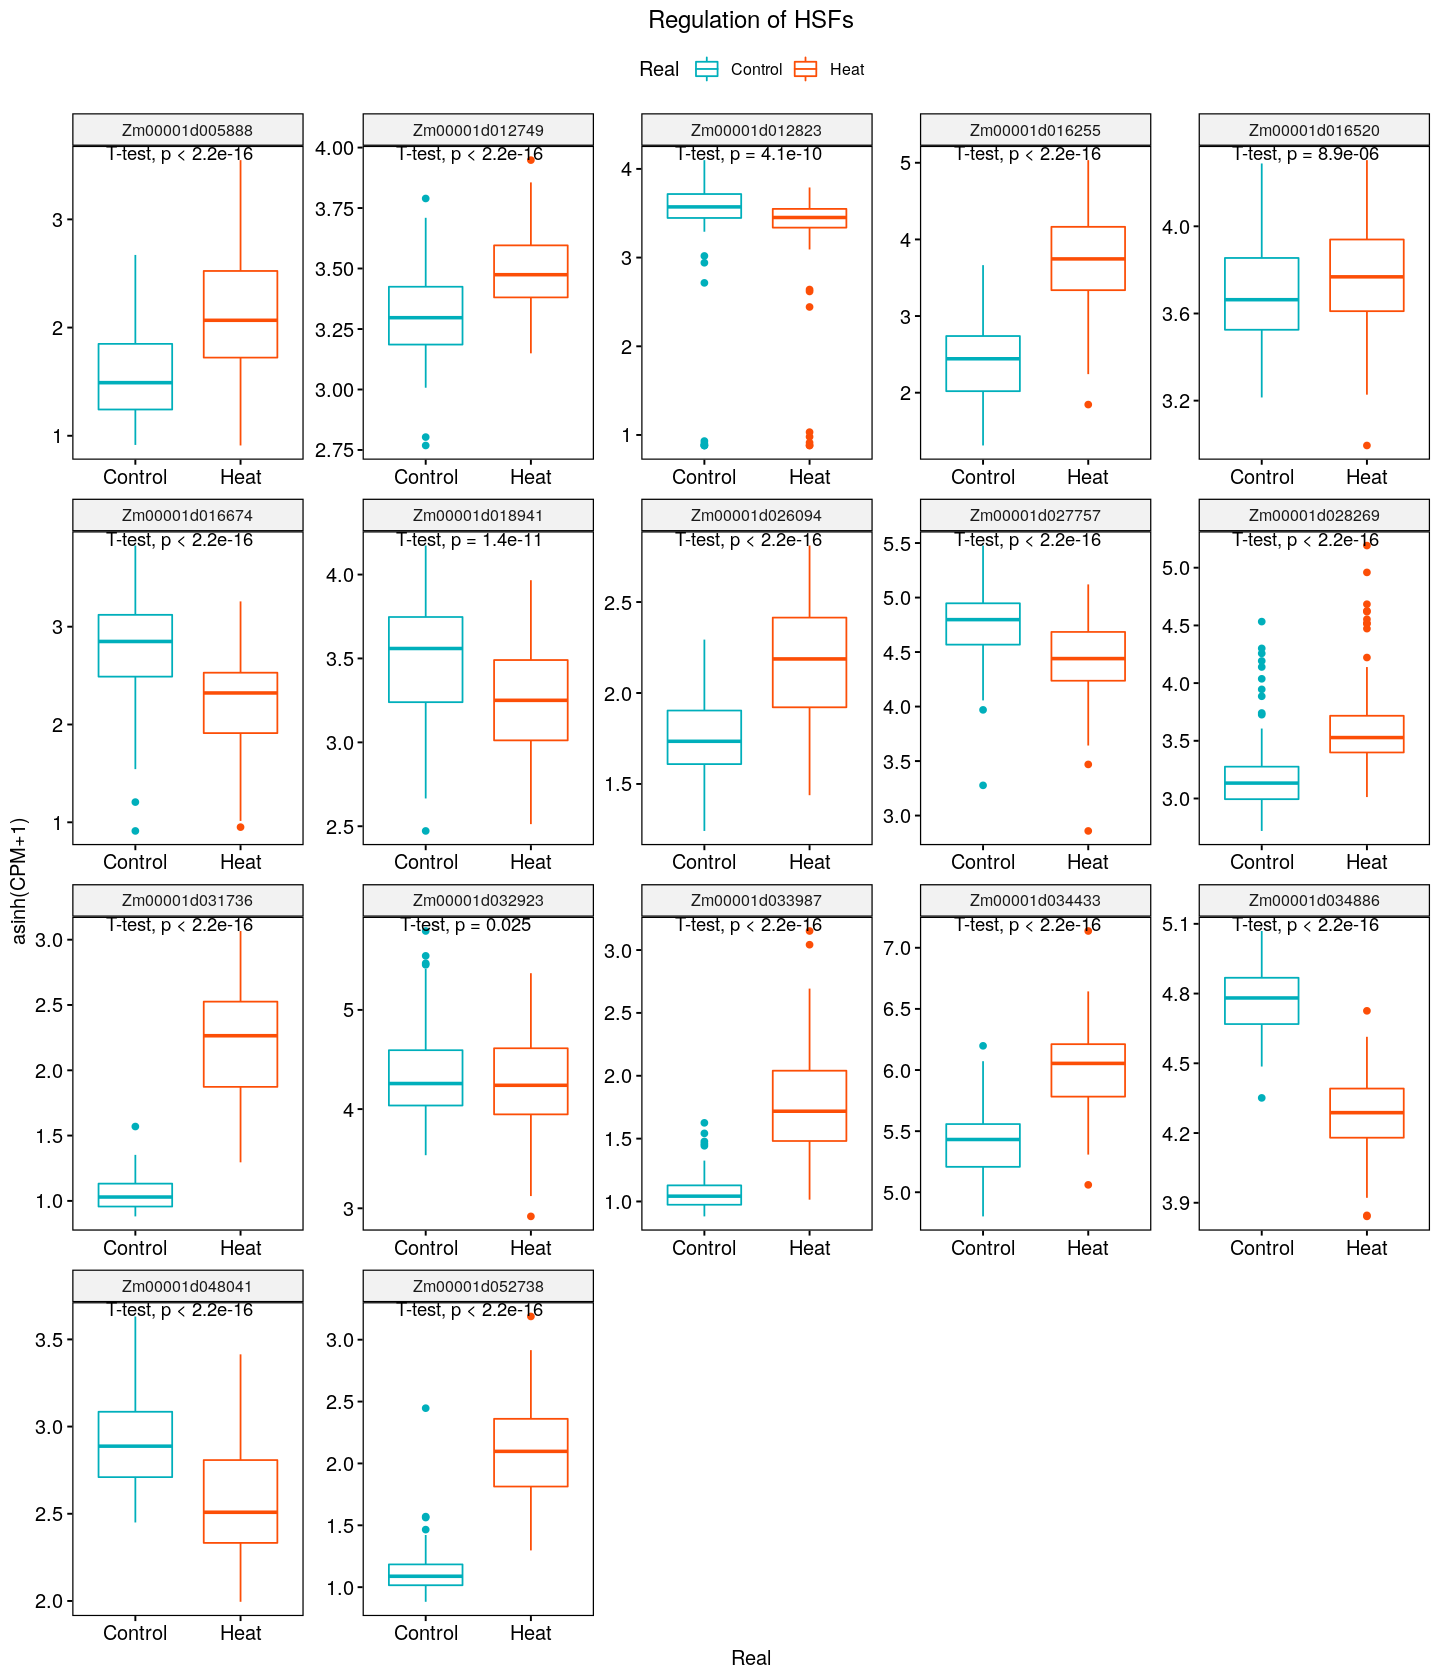

In [58]:
combine1 = combine %>% gather(key="Treatment",value="CPM",-HSF, -Gene) 
head(combine1)
combine2 = combine1 %>% mutate(Real = ifelse(startsWith(Treatment, "C"),"Control","Heat")) %>% drop_na() %>% mutate(novel=asinh(CPM+1))
head(combine2)
options(repr.plot.width=12, repr.plot.height=14)
hsfplot = ggboxplot(combine2, "Real", "novel",color = "Real",facet.by = "Gene", scales = "free", palette = c("#00AFBB", "#FC4E07")) + 
    stat_compare_means(paired = TRUE, method = "t.test") + ggtitle("Regulation of HSFs") + 
    theme(panel.grid.major=element_blank(),plot.title = element_text(hjust = 0.5)) + ylab("asinh(CPM+1)")
hsfplot

#svg("HSF-plot.svg",width=18,height=6)
#gggarrange(p7,p8,p9,nrow=1)
#ddev.off()

In [132]:
control = meta %>% filter(Condition == 'Control') %>% pull(SampleID)
heat = meta %>% filter(Condition == 'Heat') %>% pull(SampleID)
hsffpm_control = totalfpmcount %>% rownames_to_column(var="Gene") %>% mutate(Feature= str_replace(Gene, "gene:", "")) %>% 
    select(-Gene) %>% filter(Feature %in% hsf) %>% select(control, Feature) %>% column_to_rownames(var="Feature")
hsffpm_heat = totalfpmcount %>% rownames_to_column(var="Gene") %>% mutate(Feature= str_replace(Gene, "gene:", "")) %>% 
    select(-Gene) %>% filter(Feature %in% hsf) %>% select(heat, Feature) %>% column_to_rownames(var="Feature")
head(hsffpm_control)

,C01,C02,C03,C04,C05,C06,C07,C09,C10,C100,⋯,C87,C89,C91,C92,C93,C95,C96,C97,C98,C99
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Zm00001d005843,0.00000000,0.000000,0.000000,0.0000000,0.000000,0.000000,0.00000000,0.0000000,0.000000,0.000000,⋯,0.000000,0.0000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000000,0.0000000
Zm00001d005888,4.78453216,2.094880,2.060278,0.4978874,2.833147,1.236130,0.55443307,0.2670291,2.011016,1.149491,⋯,2.557531,2.7519025,1.833190,2.78501,1.146516,2.058901,3.969509,0.963267,1.31888674,0.5232689
Zm00001d011406,0.03168564,0.000000,0.000000,0.0000000,0.000000,0.000000,0.05544331,0.1602175,0.000000,0.000000,⋯,0.000000,0.2706789,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.05072641,0.0000000
Zm00001d012749,11.97717321,12.600088,12.805021,9.8219602,12.231998,11.255289,18.01907486,12.4435575,13.482949,10.892797,⋯,17.501534,14.5715495,11.433318,11.04232,10.796357,14.523600,18.354425,11.926163,15.01501827,12.3840299
Zm00001d012823,20.88083902,14.694969,17.603644,21.1828451,16.324321,15.093798,22.45453944,20.2408081,16.545178,18.829759,⋯,17.250796,16.6467547,16.016294,18.07813,13.471561,17.417191,13.292391,19.448819,12.73232968,17.7330006
Zm00001d016255,7.12926977,1.879231,8.580147,1.5841871,9.578734,3.513212,2.27317560,4.6997127,2.422360,3.995850,⋯,3.309746,9.7444418,8.780017,11.04232,6.114751,2.448423,14.275664,16.788367,2.89140555,5.9303805


In [144]:
max(asinh(hsffpm_control))
min(asinh(hsffpm_control))
max(asinh(hsffpm_heat))
min(asinh(hsffpm_heat))

[1] 6.193716

[1] 0

[1] 7.135378

[1] 0

Warning message:
“The input is a data frame, convert it to the matrix.”
Warning message:
“The input is a data frame, convert it to the matrix.”


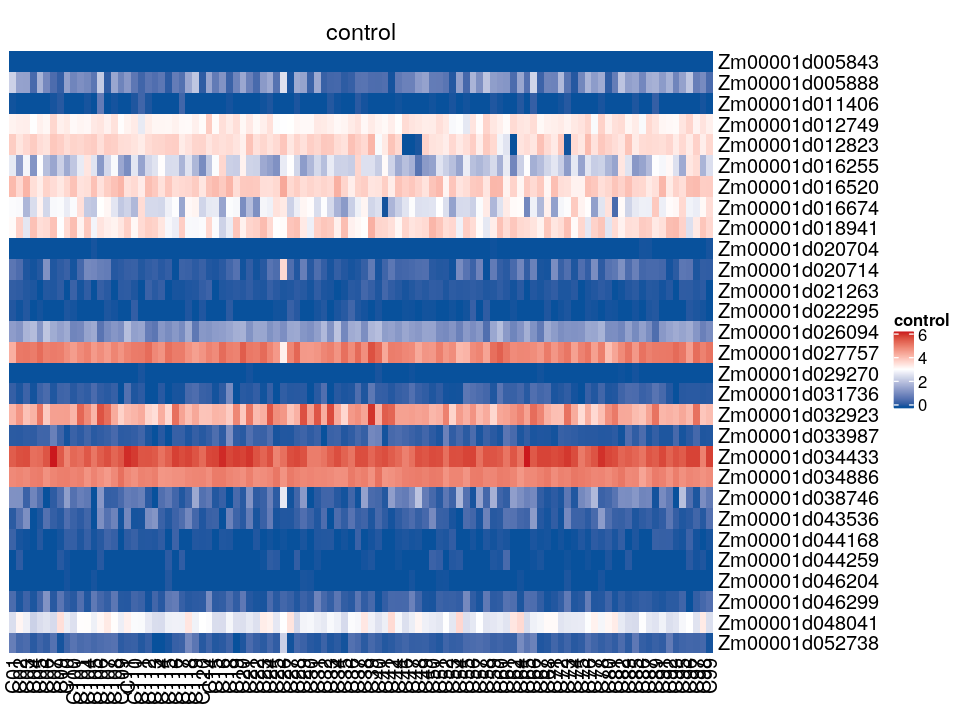

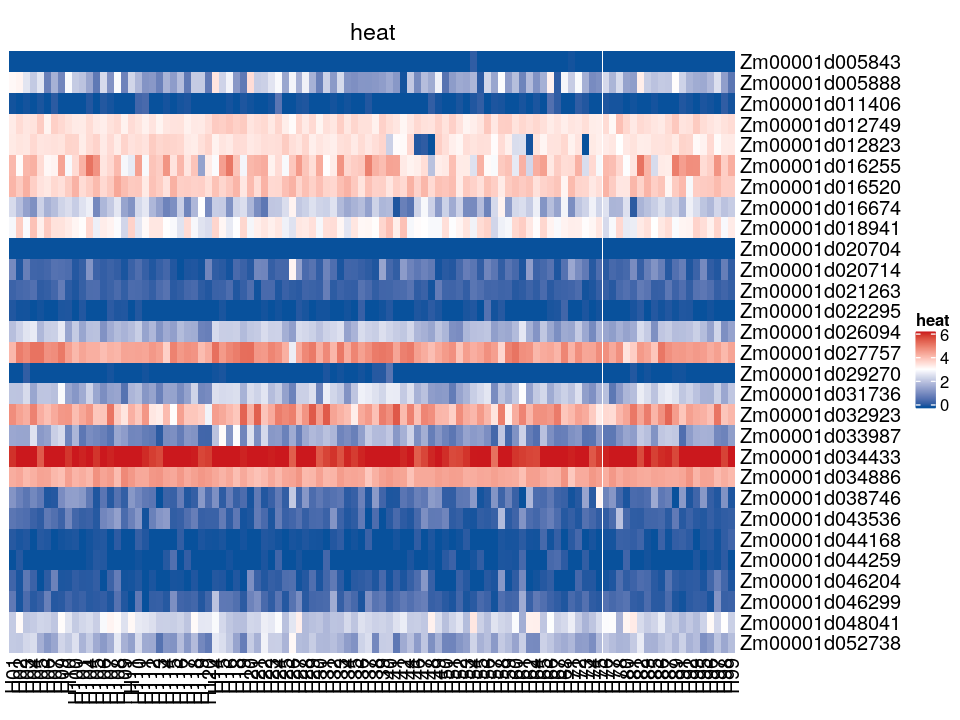

In [143]:
library(ComplexHeatmap)
library(circlize)
col_fun = colorRamp2(c(0, 3, 6), c("#08519c", "white", "#cb181d"))
Heatmap(asinh(hsffpm_control), name = "control", col = col_fun, cluster_rows = FALSE, cluster_columns = FALSE, column_title = "control")
Heatmap(asinh(hsffpm_heat), name = "heat", col = col_fun, cluster_rows = FALSE, cluster_columns = FALSE, column_title = "heat")

In [160]:
#=============checking difference between control and heat========================

zlmeta = meta %>% mutate(tmp = str_replace(SampleID, "C", "")) %>% mutate(ZLname = str_replace(tmp, "H", "")) %>% select(-tmp)
zl = unique(zlmeta$ZLname)
for (x in zl){
    control = zlmeta %>% filter(ZLname == x) %>% filter(Condition == "Control") %>% pull(SampleID) 
    heat = zlmeta %>% filter(ZLname == x) %>% filter(Condition == "Heat") %>% pull(SampleID)
    control_sample = totalfpmcount %>% pull(control)
    heat_sample = totalfpmcount %>% pull(heat)
    fit = t.test(asinh(control_sample),asinh(heat_sample))
    if (fit$p.value < 0.05){
        print (paste(x, fit$p.value, sep=':'))
    }
}

[1] "03:0.0158305156026136"
[1] "14:0.00479764943290211"
[1] "21:0.0119079113649442"
[1] "27:0.00613165811400795"
[1] "62:0.0040637617970569"
[1] "64:0.001014051626757"
[1] "74:0.0398103264996299"
[1] "75:0.00364003717010889"
[1] "99:0.0379858052733585"


In [157]:
x = t.test(asinh(control_sample),asinh(heat_sample))

In [159]:
x$p.value

[1] 0.03798581

In [231]:
# specific HSFs and associated eQTL 

control = read.table("InDel//Selected-102genos-MatrixeQTL-Control-oriCPM1.pheno",sep='\t',head=T,check.names = F)
heat = read.table("InDel//Selected-102genos-MatrixeQTL-Heat-oriCPM1.pheno",sep='\t',head=T,check.names = F)
geno = read.table("InDel/Selected-102genos-MatrixeQTL-Indel.geno",sep='\t',head=T, check.names = F)

In [232]:
Zm00001d005888_control = control %>% filter(id == 'Zm00001d032923')
Zm00001d005888_heat = heat %>% filter(id == 'Zm00001d032923')
snp = geno %>% filter(id == 'S1_243207880')
head(Zm00001d005888_control)
head(Zm00001d005888_heat)
head(snp)

,id,1538,2369,2MA22,33-16,3IJI1,4226,4F-234-BX-4,6M502,764,⋯,PHJ40,PHK42,PHJ33,PHR36,PHWG5,PHV63,PHW30,PHW43,PHW52,PHW79
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Zm00001d032923,29.34091,46.17979,24.54078,30.50692,71.90796,21.59975,39.86374,40.10778,40.63167,⋯,37.51045,75.51942,28.94511,31.12371,28.6629,35.78036,27.93223,77.38245,22.87761,26.1053


,id,1538,2369,2MA22,33-16,3IJI1,4226,4F-234-BX-4,6M502,764,⋯,PHJ40,PHK42,PHJ33,PHR36,PHWG5,PHV63,PHW30,PHW43,PHW52,PHW79
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Zm00001d032923,52.21844,38.52392,32.776,61.05935,32.37766,25.53083,34.48471,44.73636,46.40594,⋯,89.83448,41.69799,23.13176,40.16477,33.70632,31.17781,24.95337,73.37753,23.36808,28.61597


,id,1538,2369,2MA22,33-16,3IJI1,4226,4F-234-BX-4,6M502,764,⋯,PHJ40,PHK42,PHJ33,PHR36,PHWG5,PHV63,PHW30,PHW43,PHW52,PHW79
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,S1_243207880,1,0,0,0,0,0,2,0,2,⋯,0,0,0,0,0,0,2,0,2,0


In [233]:
library(data.table)
control = transpose(rbind(Zm00001d005888_control, snp))
colnames(control) = control[1,]
control = control[-1,]
control1 = control %>% mutate(indel = ifelse(S1_243207880 == 0, "Yes", "No"))
head(control1)
control1$Zm00001d032923 = as.numeric(control1$Zm00001d032923)

heat = transpose(rbind(Zm00001d005888_heat, snp))
colnames(heat) = heat[1,]
heat = heat[-1,]
heat1 = heat %>% mutate(indel = ifelse(S1_243207880 == 0, "Yes", "No"))
head(heat1)
heat1$Zm00001d032923 = as.numeric(heat1$Zm00001d032923)

,Zm00001d032923,S1_243207880,indel
,<chr>,<chr>,<chr>
2,29.3409058091161,1,No
3,46.1797861434607,0,Yes
4,24.5407842494111,0,Yes
5,30.506917877081,0,Yes
6,71.9079595676546,0,Yes
7,21.5997451581036,0,Yes


,Zm00001d032923,S1_243207880,indel
,<chr>,<chr>,<chr>
2,52.2184395997931,1,No
3,38.5239242224921,0,Yes
4,32.7759971487998,0,Yes
5,61.0593534454733,0,Yes
6,32.377661786007,0,Yes
7,25.5308255698029,0,Yes


,Control,Heat,S1_243207880
,<chr>,<chr>,<chr>
2,29.3409058091161,52.2184395997931,1
3,46.1797861434607,38.5239242224921,0
4,24.5407842494111,32.7759971487998,0
5,30.506917877081,61.0593534454733,0
6,71.9079595676546,32.377661786007,0
7,21.5997451581036,25.5308255698029,0


,Control,Heat,S1_243207880,indel
,<chr>,<chr>,<chr>,<chr>
2,29.3409058091161,52.2184395997931,1,Yes
3,46.1797861434607,38.5239242224921,0,No
4,24.5407842494111,32.7759971487998,0,No
5,30.506917877081,61.0593534454733,0,No
6,71.9079595676546,32.377661786007,0,No
7,21.5997451581036,25.5308255698029,0,No


,Control,Heat,S1_243207880,indel
,<dbl>,<dbl>,<chr>,<chr>
2,29.34091,52.21844,1,Yes
3,46.17979,38.52392,0,No
4,24.54078,32.77600,0,No
5,30.50692,61.05935,0,No
6,71.90796,32.37766,0,No
7,21.59975,25.53083,0,No


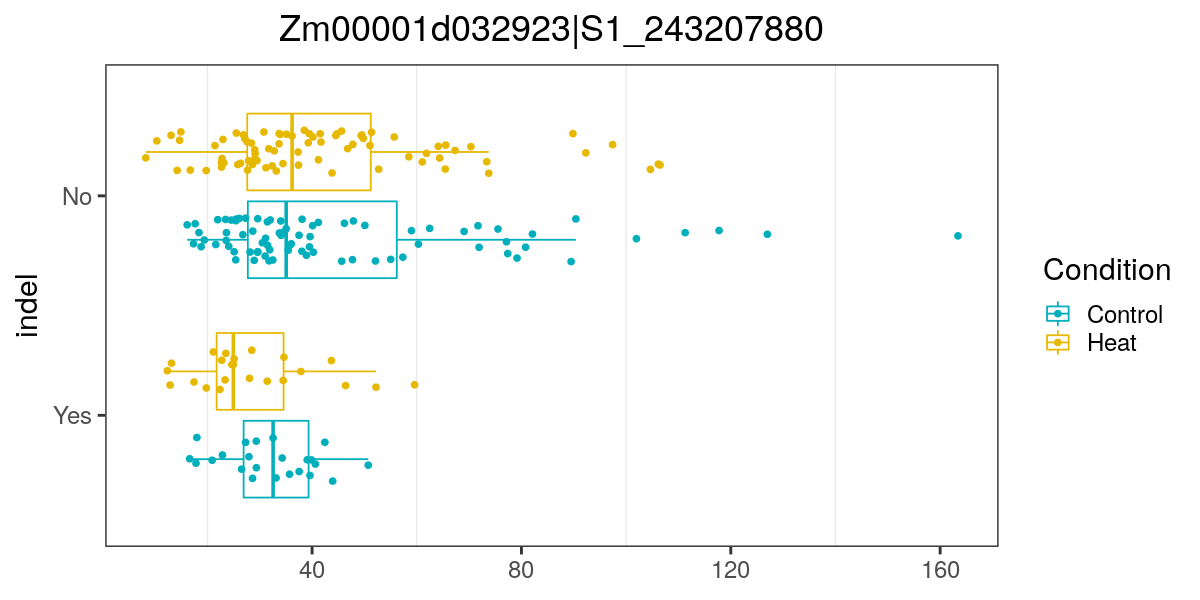

In [235]:
total = transpose(rbind(Zm00001d005888_control, Zm00001d005888_heat, snp))
colnames(total) = c("Control","Heat","S1_243207880")
total = total[-1,]
head(total)
total1 = total %>% mutate(indel = ifelse(S1_243207880 == 0, "No", "Yes"))
head(total1)
total1$Control = as.numeric(total1$Control)
total1$Heat = as.numeric(total1$Heat)
head(total1)

options(repr.plot.width=10, repr.plot.height=5)
total2 = total1 %>% select(-S1_243207880) %>% gather(Condition, CPM, -indel)
ggboxplot(total2, "indel", "CPM", color = "Condition",
 palette = c("#00AFBB", "#E7B800"), add = "jitter", orientation = "horizontal") + theme_bw(base_size = 18) + ggtitle("Zm00001d032923|S1_243207880") + 
    theme(panel.grid.major=element_blank(),plot.title = element_text(hjust = 0.5)) + ylab(NULL)

In [435]:
# ========calculating assocations between variations and mean ratio between control and heat=========#
control = read.table("ControlHeatCtoT/Widiv-CPM-gene-organized-control.txt",sep=',',head=T)
heat = read.table("ControlHeatCtoT/Widiv-CPM-gene-organized-heat.txt",sep=',',head=T)
CtoT = read.table("ControlHeatCtoT/Widiv-CPM-expressed-gene-CtoT.txt",sep=',',head=T)
rownames(CtoT) = CtoT$Gene
rownames(control) = control$Gene
rownames(heat) = heat$Gene
CtoT1 = CtoT[,-1]
control1 = control[,-1]
heat1 = heat[,-1]
head(CtoT1)

,G1,G10,G100,G101,G104,G105,G107,G108,G109,G11,⋯,G89,G9,G91,G92,G93,G95,G96,G97,G98,G99
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSRNA049458957,1.1415530,1.1963526,1.1865971,0.9135426,1.269360,1.1217844,1.7812727,1.0093881,0.9739658,1.913353,⋯,0.9721486,2.3884387,3.9416478,9.9376386,2.2175335,0.6814903,0.59435914,1.3281572,1.0729728,1.3348022
ENSRNA049459076,1.7745411,2.7485962,1.1149402,0.9985700,1.287188,0.8523861,1.5720242,1.3849801,0.9110884,1.827466,⋯,0.8946464,2.0287562,2.4342443,1.3675146,3.3653518,1.0441472,0.80829759,2.5724446,0.8668866,1.2116468
ENSRNA049459101,1.4194338,0.8186361,0.6113268,0.4578255,1.202349,1.2807391,1.3959787,0.6862794,0.6662261,2.181321,⋯,1.0788956,1.9901454,1.1024675,3.1761983,0.9440803,1.9258028,0.66339732,2.7121585,1.1099635,0.9595997
ENSRNA049459156,2.0145366,1.8182872,1.3261339,0.9952873,1.438053,1.4994407,1.4232215,1.2189892,1.2869336,1.916700,⋯,1.2887983,2.2292194,3.5594079,2.2114868,0.9056984,1.5179514,0.78938861,1.4212010,1.1083357,1.5442140
ENSRNA049463813,0.2536666,0.1500377,0.9045256,2.5447554,1.064066,0.7802564,0.1847661,2.9150732,0.5028205,1.054278,⋯,0.2781812,0.2207911,0.4840125,0.7823734,1.1880832,1.0000000,0.02709275,0.4957192,0.5906181,0.3191547
ENSRNA049465110,1.9544277,5.8207899,1.6042082,8.9837154,1.036699,0.8167969,1.0030578,0.4728885,0.4338461,2.367502,⋯,1.9785069,6.6695825,3.9060475,2.3676213,100.0714689,3.2744183,2.88891480,3.4302195,3.3218785,5.5200768


In [449]:
columns = colnames(control1)
ctrlgene = control1 %>% 
  mutate(Mean= rowMeans(.[columns]), stdev=rowSds(as.matrix(.[columns])), cv=rowSds(as.matrix(.[columns]))/rowMeans(.[columns])) %>%
  rownames_to_column(var="Gene") %>% select(Gene, Mean, stdev, cv)
columns1 = colnames(heat1)
heatgene = heat1 %>% 
  mutate(Mean= rowMeans(.[columns1]), stdev=rowSds(as.matrix(.[columns1])), cv=rowSds(as.matrix(.[columns1]))/rowMeans(.[columns1])) %>%
  rownames_to_column(var="Gene") %>% select(Gene, Mean, stdev, cv)
columns2 = colnames(CtoT1)
CtoTgene1 = CtoT1 %>% 
  mutate(Mean= rowMeans(.[columns2]), stdev=rowSds(as.matrix(.[columns2])), cv=rowSds(as.matrix(.[columns2]))/rowMeans(.[columns2])) %>%
  rownames_to_column(var="Gene") %>% select(Gene, Mean, stdev, cv) %>% filter(Gene %in% hg$Gene)
CtoTgene2 = CtoT1 %>% 
  mutate(Mean= rowMeans(.[columns2]), stdev=rowSds(as.matrix(.[columns2])), cv=rowSds(as.matrix(.[columns2]))/rowMeans(.[columns2])) %>%
  rownames_to_column(var="Gene") %>% select(Gene, Mean, stdev, cv) %>% filter(Gene %in% cg$Gene)

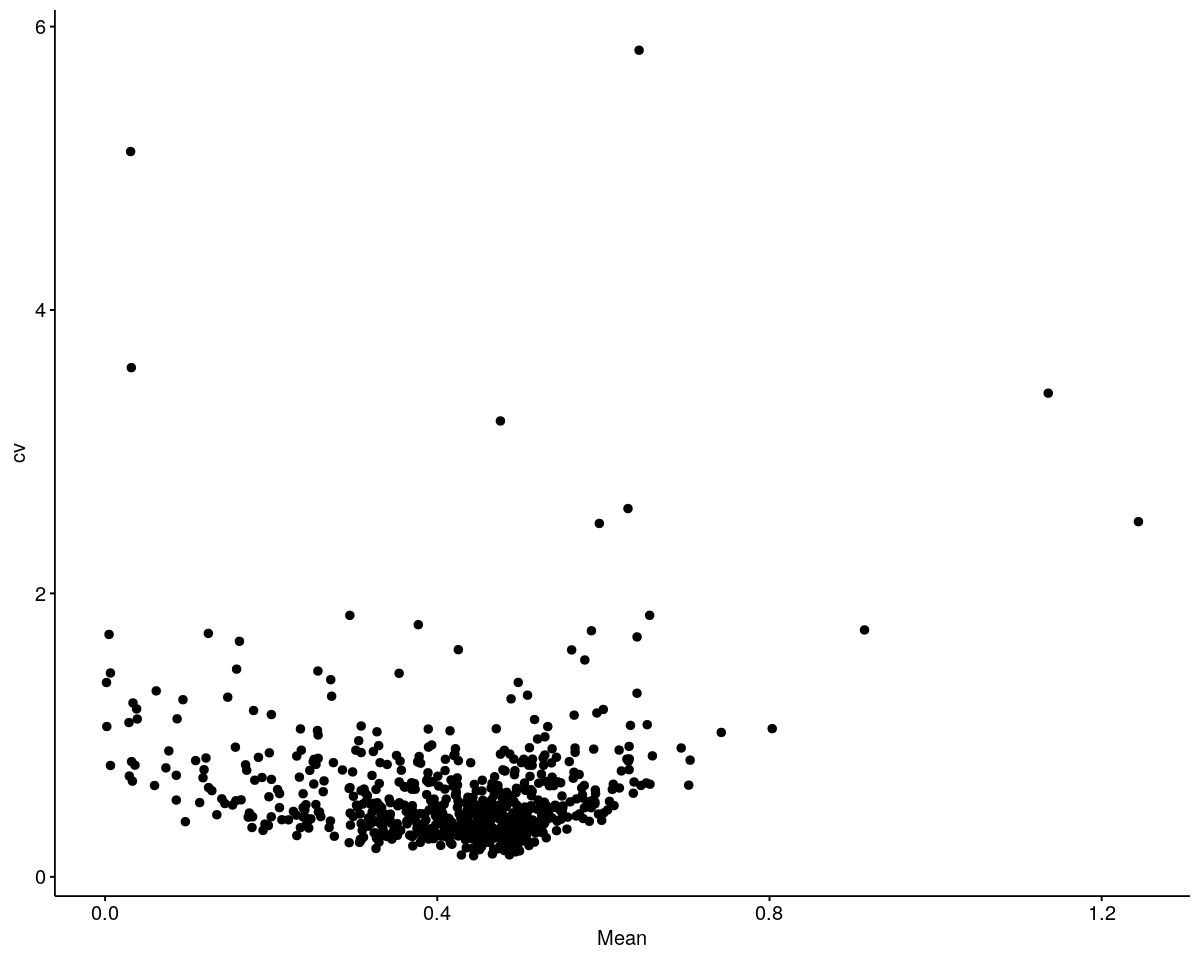

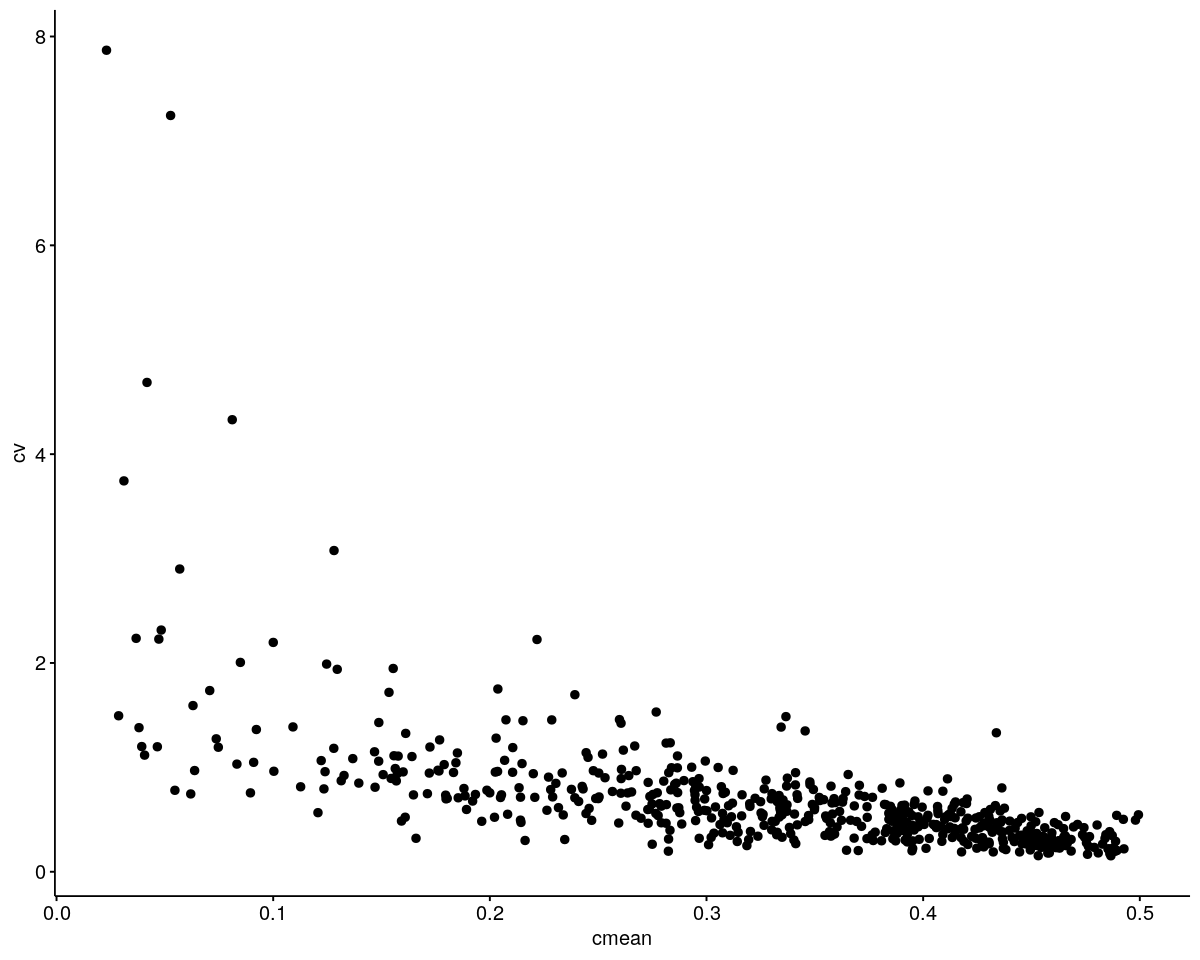

In [453]:
ggscatter(CtoTgene1, "Mean", "cv")
CtoTgene3 = CtoTgene2 %>% mutate(cmean = 1/Mean)
ggscatter(CtoTgene3, "cmean", "cv")

In [434]:
ctrlcv = ctrlgene %>% filter(Gene %in% cg$Gene) %>% arrange(cv) # 564
heatcv = heatgene %>% filter(Gene %in% hg$Gene) %>% arrange(cv) # 701
write.table(file="Heatupregulated-1cpm-1cpm-2fold-addcv.txt",hg$Gene,row.names = F)
write.table(file="Controlupregulated-1cpm-1cpm-2fold-addcv.txt",cg$Gene,row.names = F)

In [433]:
ctrlcv1 = ctrlcv[c(1:188),]
ctrlcv2 = ctrlcv[c(189:376),]
ctrlcv3 = ctrlcv[c(376:564),]
heatcv1 = heatcv[c(1:233),]
heatcv2 = heatcv[c(234:467),]
heatcv3 = heatcv[c(467:701),]
write.table(file="Heatupregulated-1cpm-1cpm-2fold-addcv1.txt",heatcv1$Gene,row.names = F)
write.table(file="Heatupregulated-1cpm-1cpm-2fold-addcv2.txt",heatcv2$Gene,row.names = F)
write.table(file="Heatupregulated-1cpm-1cpm-2fold-addcv3.txt",heatcv3$Gene,row.names = F)
write.table(file="Controlupregulated-1cpm-1cpm-2fold-addcv1.txt",ctrlcv1$Gene,row.names = F)
write.table(file="Controlupregulated-1cpm-1cpm-2fold-addcv2.txt",ctrlcv2$Gene,row.names = F)
write.table(file="Controlupregulated-1cpm-1cpm-2fold-addcv3.txt",ctrlcv3$Gene,row.names = F)

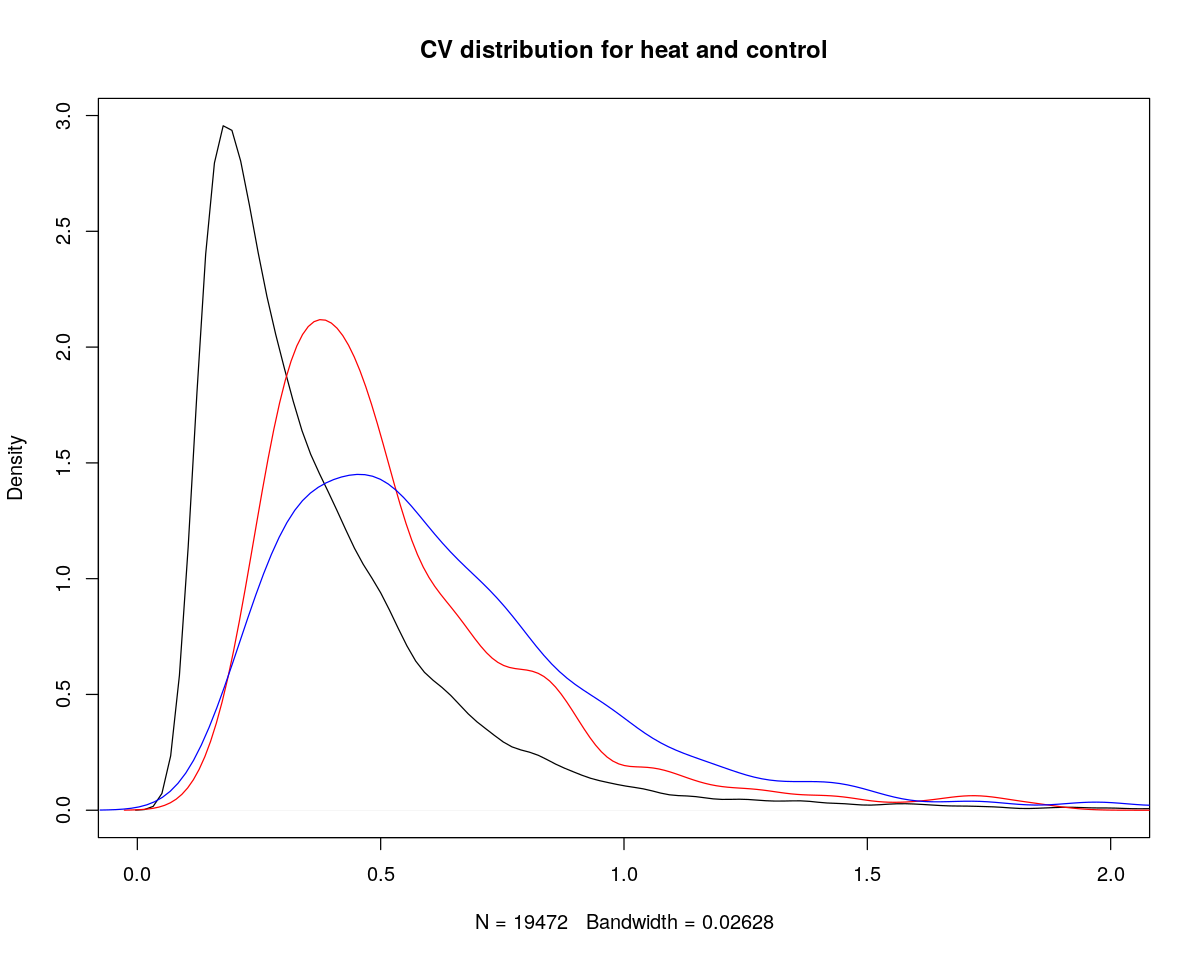

In [402]:
d = density(CtoTgene$cv)
hh = density(CtoTgene$cv[CtoTgene$Gene %in% hg$Gene])
ch = density(CtoTgene$cv[CtoTgene$Gene %in% cg$Gene])
plot(d, xlim=c(0,2),main="CV distribution for heat and control")
lines(hh, col="red")
lines(ch, col="blue")

In [365]:
combdata = ctrlgene %>% left_join(heatgene, by="Gene") %>% drop_na()
head(combdata)

,Gene,Mean.x,stdev.x,cv.x,Mean.y,stdev.y,cv.y
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSRNA049458957,1.386360,0.7723302,0.5570922,1.164457,0.7096022,0.6093846
2,ENSRNA049459076,1.736918,1.0018390,0.5767912,1.301597,0.9319042,0.7159696
3,ENSRNA049459156,2.044870,1.2007315,0.5871922,1.502854,1.0095841,0.6717777
4,ENSRNA049469775,16.553426,12.3225001,0.7444079,15.349840,12.3211040,0.8026862
5,ENSRNA049472786,1.479120,0.9400713,0.6355613,1.548012,0.9678869,0.6252451
6,ENSRNA049474917,1.723055,1.9011768,1.1033755,1.365510,1.3987278,1.0243267


In [366]:
comb1 = combdata %>% mutate(Color = ifelse(Gene %in% cg$Gene, "chigher", ifelse(Gene %in% hg$Gene, "hhigher", "none")))

Warning message:
“Duplicated aesthetics after name standardisation: alpha”
Warning message:
“Duplicated aesthetics after name standardisation: alpha”


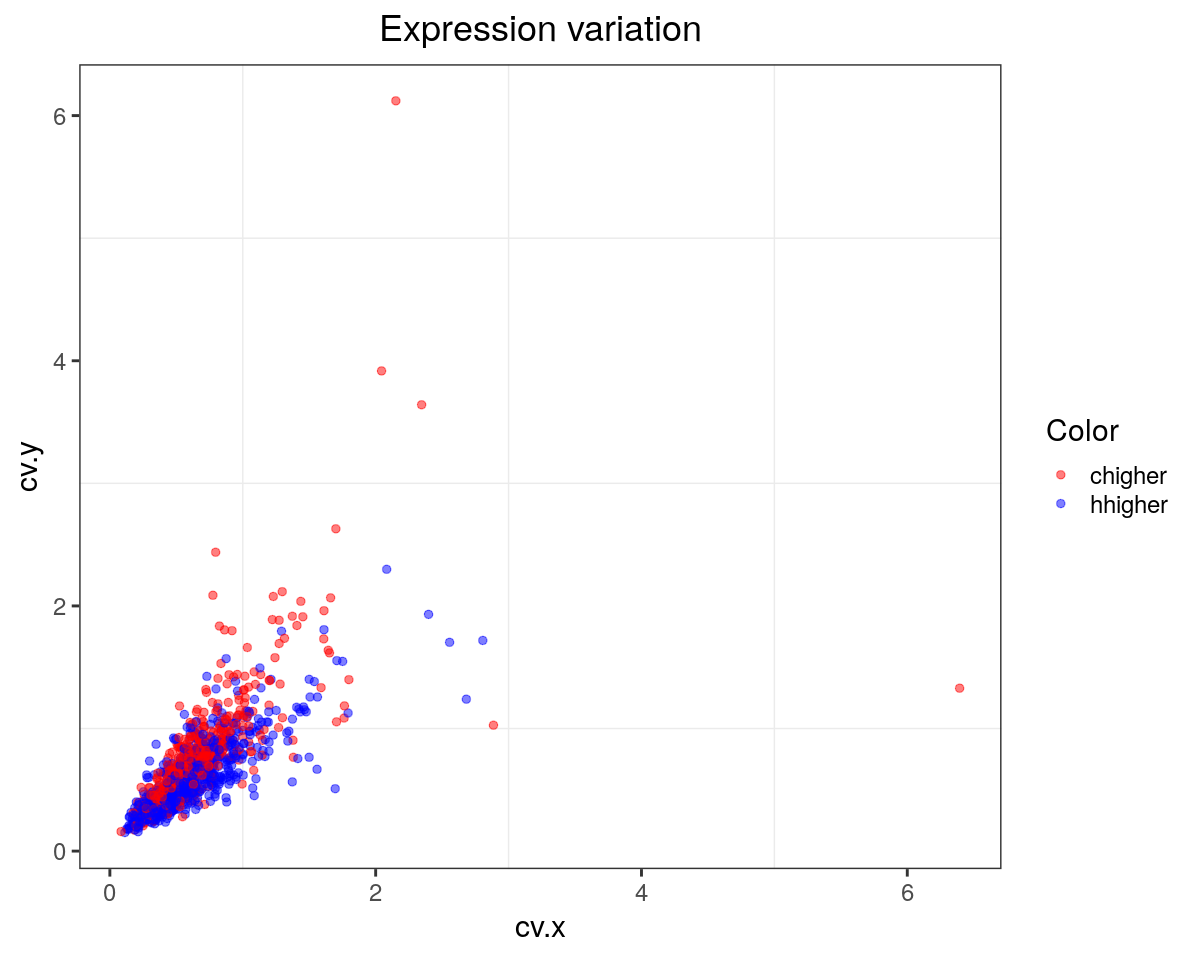

Warning message:
“Duplicated aesthetics after name standardisation: alpha”


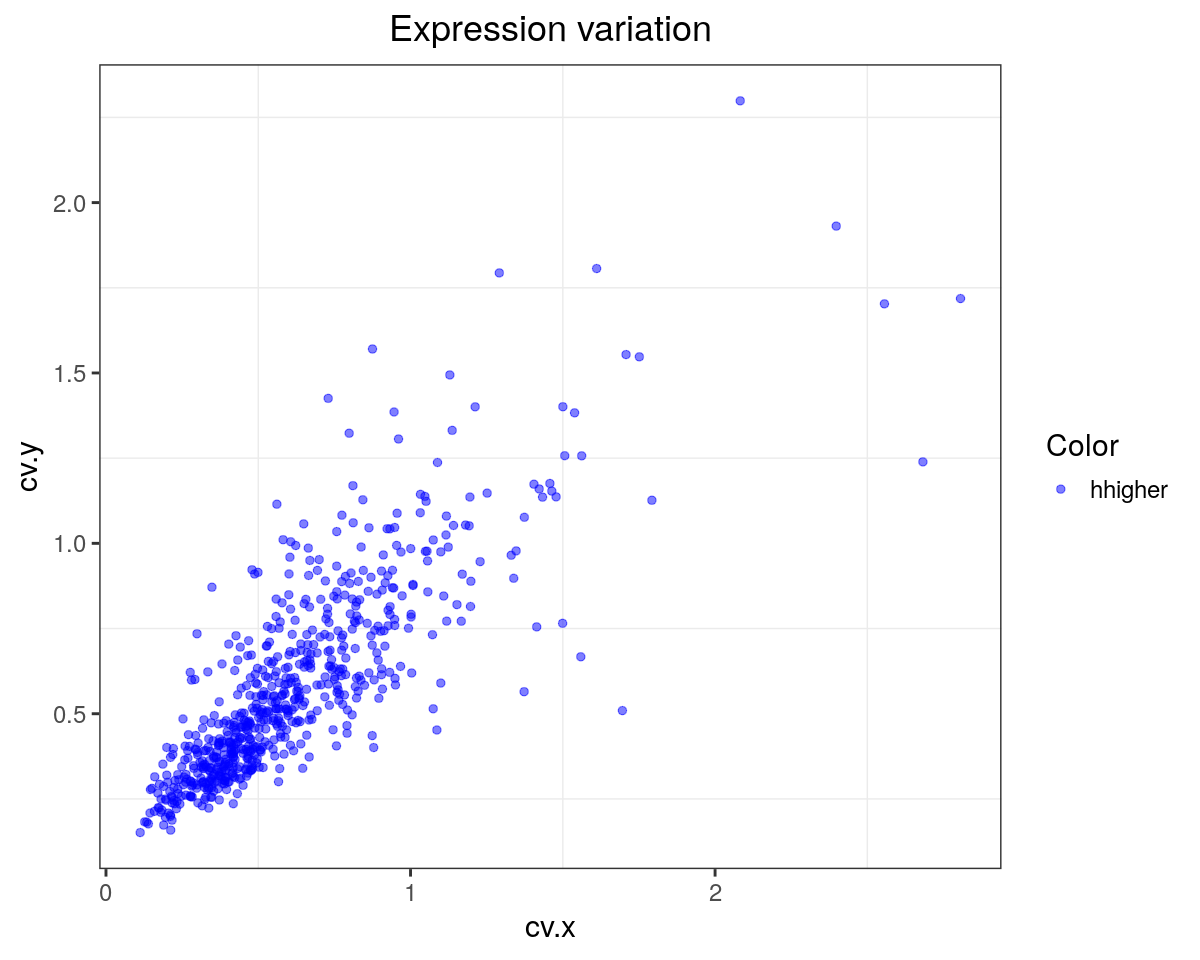

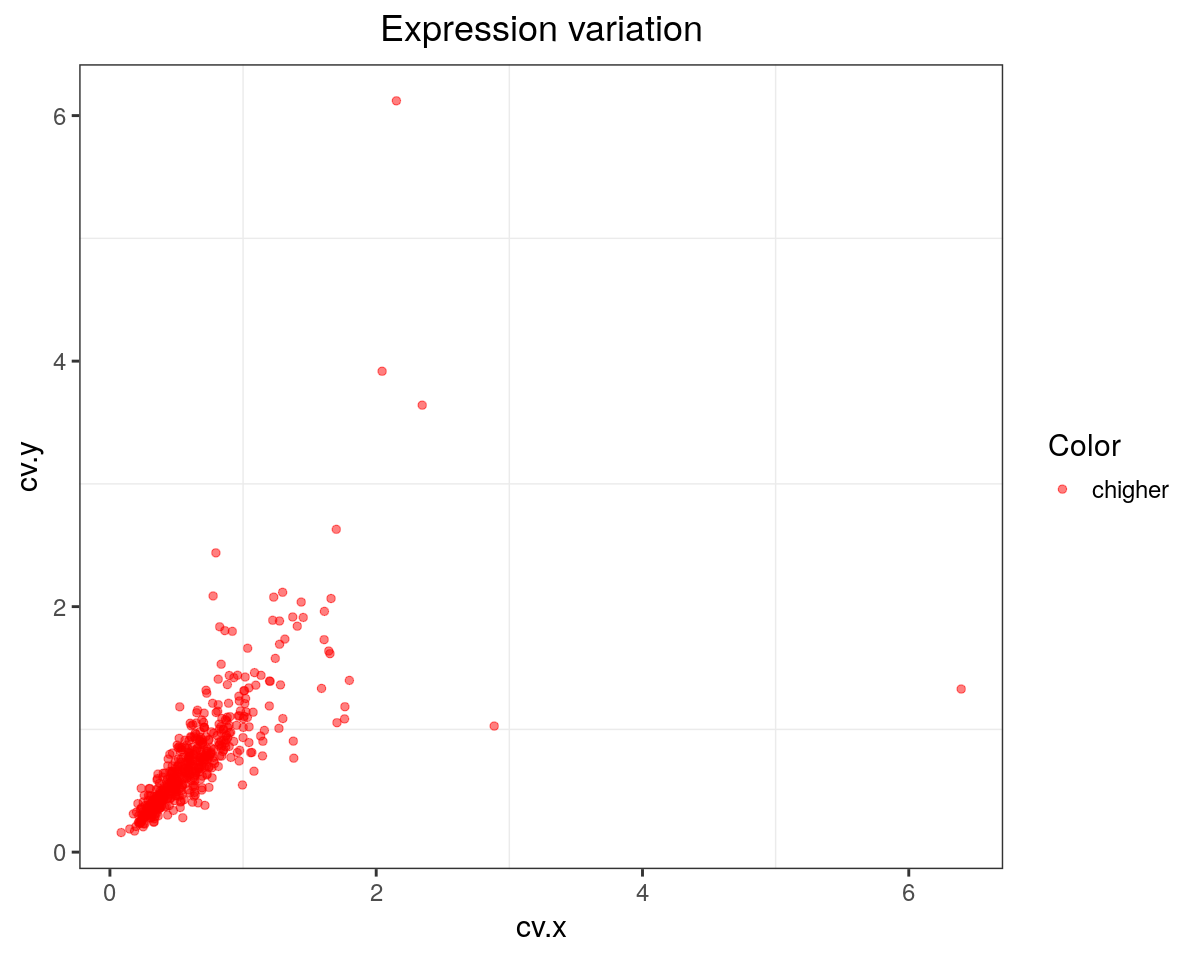

In [375]:
options(repr.plot.width=10, repr.plot.height=8)
comb2 = comb1 %>% filter(Color != 'none')
p  <- ggplot(comb2, aes(cv.x,cv.y,color=Color))
p + geom_point(alpha=0.5,size=2,alpha=0.2) + scale_color_manual(values = c("red","blue")) + 
    theme_bw(base_size = 18) + ggtitle("Expression variation") + 
    theme(panel.grid.major=element_blank(),plot.title = element_text(hjust = 0.5))
comb2 = comb1 %>% filter(Color != 'none', Color != 'chigher')
p  <- ggplot(comb2, aes(cv.x,cv.y,color=Color))
p + geom_point(alpha=0.5,size=2,alpha=0.2) + scale_color_manual(values = c("blue")) + 
    theme_bw(base_size = 18) + ggtitle("Expression variation") + 
    theme(panel.grid.major=element_blank(),plot.title = element_text(hjust = 0.5))
comb2 = comb1 %>% filter(Color != 'none', Color != 'hhigher')
p  <- ggplot(comb2, aes(cv.x,cv.y,color=Color))
p + geom_point(alpha=0.5,size=2,alpha=0.2) + scale_color_manual(values = c("red")) + 
    theme_bw(base_size = 18) + ggtitle("Expression variation") + 
    theme(panel.grid.major=element_blank(),plot.title = element_text(hjust = 0.5))

,GO,V1,V2,V3,V4,V5
,<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,1,GO:0080170,BP,e,hydrogen peroxide transmembrane transport,0.000234
2,2,GO:0033530,BP,e,raffinose metabolic process,0.000559
3,3,GO:0034484,BP,e,raffinose catabolic process,0.000559
4,4,GO:0009269,BP,e,response to desiccation,0.001230
5,5,GO:0010286,BP,e,heat acclimation,0.003780
6,6,GO:0009644,BP,e,response to high light intensity,0.003860


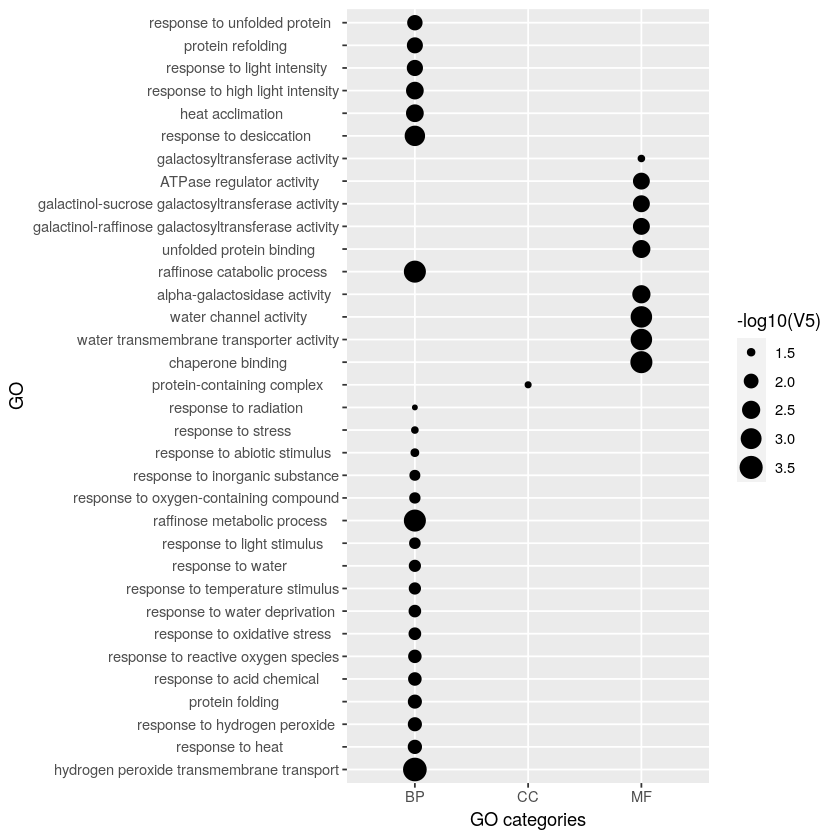

In [23]:
# GO plot

x = read.table("GOenrichment//Heatupregulated-1cpm-1cpm-2fold-organized.GO",head=F,sep='\t')
x1 = x %>% rownames_to_column(var="GO")
head(x1)
ggplot(x1, aes(x=V2, y=GO, size=-log10(V5))) +
  geom_point() + scale_y_discrete(breaks=x1$GO,
        labels=x1$V4) + xlab("GO categories")